# Global Power Plant Database

## Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

The database includes the following indicators:
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 



#### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 


#### Prediction :      
Make two prediction  1) Primary Fuel    2) capacity_mw 

##### Hint : Use pandas methods to combine all the datasets and then start working on this project.



##### Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/tree/main/Global%20Power%20Plant%20Database


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, median_absolute_error, max_error,accuracy_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,ExtraTreesRegressor, AdaBoostRegressor

from sklearn.neighbors import KNeighborsRegressor

In [11]:
file_names = ['database_AUS.csv', 'database_IND.csv', 'database_USA.csv']

dfs1 = []

for data1 in file_names:
    df2 = pd.read_csv(data1)
    dfs1.append(df2)

    
df = pd.concat(dfs1, ignore_index=True)

In [12]:
df

country              country_long                           name  \
0         AUS                 Australia               Adelaide Airport   
1         AUS                 Australia           Adelaide Showgrounds   
2         AUS                 Australia               Albany Wind Farm   
3         AUS                 Australia          Alice Springs Airport   
4         AUS                 Australia                   Amcor Gawler   
...       ...                       ...                            ...   
13293     USA  United States of America       Zotos International WPGF   
13294     USA  United States of America  Zumbro Community Solar Garden   
13295     USA  United States of America            Zumbro Solar Garden   
13296     USA  United States of America                           Zuni   
13297     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      AUS0000433         0.11  -34.9387   138.5377        Solar         NaN   
1      AUS0000432         1.00  -34.9453   138.5882        Solar         NaN   
2      AUS0000065        21.60  -35.0641   117.7977         Wind         NaN   
3      AUS0000469         0.24  -23.7966   133.8971        Solar         NaN   
4      AUS0000231         4.00  -34.5509   138.7659          Oil         NaN   
...           ...          ...       ...        ...          ...         ...   
13293  USA0057648         3.40   42.8869   -76.9683         Wind         NaN   
13294  USA0061574         1.00   44.3195   -92.6703        Solar         NaN   
13295  USA0063426         0.00   44.0460   -92.7600          NaN         NaN   
13296  USA0000478         0.00   39.7373  -105.0170          NaN         NaN   
13297  USA0059281         9.80   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0             NaN  ...                2019.0                  NaN   
1             NaN  ...                2019.0                  NaN   
2             NaN  ...                2019.0            89.595278   
3             NaN  ...                2019.0                  NaN   
4             NaN  ...                2019.0                  NaN   
...           ...  ...                   ...                  ...   
13293         NaN  ...                2019.0             3.671000   
13294         NaN  ...                2019.0                  NaN   
13295         NaN  ...                2019.0                  NaN   
13296         NaN  ...                2019.0             0.000000   
13297         NaN  ...                2019.0            12.968000   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2              102.642778           96.555556           95.872778   
3                     NaN                 NaN                 NaN   
4                     NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
13293            2.460150            2.489000            1.670000   
13294                 NaN                 NaN                 NaN   
13295                 NaN                 NaN                 NaN   
13296            0.000000            0.000000                 NaN   
13297           51.276000           71.505000           76.392000   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2               85.900278            92.682222                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
1

In [13]:
df.sample(10)

country              country_long  \
7232      USA  United States of America   
852       IND                     India   
13025     USA  United States of America   
10670     USA  United States of America   
3944      USA  United States of America   
1766      USA  United States of America   
8492      USA  United States of America   
1344      IND                     India   
12666     USA  United States of America   
2029      USA  United States of America   

                                        name   gppd_idnr  capacity_mw  \
7232                        Latigo Wind Park  USA0059965         62.1   
852                                 KHANDONG  IND0000194         50.0   
13025                      Wildwood Solar II  USA0059253         15.0   
10670                      Schell Solar Farm  USA0059591          5.0   
3944               Crossing Trails Wind Farm  USA0062489          0.0   
1766                   Amazon San Bernardino  USA0059800          1.1   
8492                            Narrows (NC)  USA0054894        108.8   
1344        Teona Pujarian Solar Power Plant  WRI1026217         22.0   
12666  Waste Management Naples LFGTE Project  USA0057168          4.0   
2029                          Auglaize Hydro  USA0007657          3.6   

       latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
7232    37.8867  -109.3684         Wind         NaN         NaN  ...   
852     25.5177    92.6679        Hydro         NaN         NaN  ...   
13025   35.6300  -119.5739        Solar         NaN         NaN  ...   
10670   36.4356   -77.5664        Solar         NaN         NaN  ...   
3944    39.0466  -102.8224          NaN         NaN         NaN  ...   
1766    34.0884  -117.2458          Gas         NaN         NaN  ...   
8492    35.4189   -80.0917        Hydro         NaN         NaN  ...   
1344    27.4137    72.1577        Solar         NaN         NaN  ...   
12666   26.1558   -81.6581        Waste         NaN         NaN  ...   
2029    41.2372   -84.3998        Hydro         NaN         NaN  ...   

      year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
7232                 2019.0                  NaN                 NaN   
852                  2019.0                  NaN            87.42070   
13025                2019.0                  NaN                 NaN   
10670                2019.0                  NaN                 NaN   
3944                 2019.0                  NaN                 NaN   
1766                 2019.0                  NaN             0.80100   
8492                 2019.0              562.776           420.55500   
1344                    NaN                0.001                 NaN   
12666                2019.0               25.696            25.03900   
2029                 2019.0                0.011            10.76922   

      generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
7232                  NaN            104.4850           153.70600   
852             174.17475            196.1145           259.46615   
13025                 NaN              0.0000            40.41700   
10670                 NaN              0.1630             9.14100   
3944                  NaN                 NaN                 NaN   
1766              8.69900              7.9230             7.71500   
8492            361.66600            398.2660           335.45700   
1344                  NaN                 NaN                 NaN   
12666            21.18200             17.3000            16.96000   
2029              8.86100              8.7430            11.10500   

       generation_gwh_2018  generation_gwh_2019  \
7232              155.2510              165.201   
852               202.8009                  NaN   
13025              41.0530               39.211   
10670               8.6980                9.192   
3944                   NaN                  NaN   
1766                7.1660                6.823   
8492              592.793

In [14]:
df.head(10)

country country_long                   name   gppd_idnr  capacity_mw  \
0     AUS    Australia       Adelaide Airport  AUS0000433         0.11   
1     AUS    Australia   Adelaide Showgrounds  AUS0000432         1.00   
2     AUS    Australia       Albany Wind Farm  AUS0000065        21.60   
3     AUS    Australia  Alice Springs Airport  AUS0000469         0.24   
4     AUS    Australia           Amcor Gawler  AUS0000231         4.00   
5     AUS    Australia               Angaston  AUS0000232        50.00   
6     AUS    Australia               Anglesea  AUS0000114       165.00   
7     AUS    Australia               Angurugu  AUS0000615         3.60   
8     AUS    Australia           Appin (Mine)  AUS0000264        55.60   
9     AUS    Australia       Ararat Wind Farm  AUS0000611       240.00   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0  -34.9387   138.5377        Solar         NaN         NaN  ...   
1  -34.9453   138.5882        Solar         NaN         NaN  ...   
2  -35.0641   117.7977         Wind         NaN         NaN  ...   
3  -23.7966   133.8971        Solar         NaN         NaN  ...   
4  -34.5509   138.7659          Oil         NaN         NaN  ...   
5  -34.5034   139.0246          Oil         NaN         NaN  ...   
6  -38.3861   144.1828         Coal         NaN         NaN  ...   
7  -13.8584   136.4209          Oil         NaN         NaN  ...   
8  -34.2082   150.7722          Gas         NaN         NaN  ...   
9  -37.2385   143.0794         Wind         NaN         NaN  ...   

  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                2019.0                  NaN                 NaN   
1                2019.0                  NaN                 NaN   
2                2019.0            89.595278          102.642778   
3                2019.0                  NaN                 NaN   
4                2019.0                  NaN                 NaN   
5                2019.0                  NaN                 NaN   
6                2019.0          1095.676944         1239.962778   
7                2019.0                  NaN                 NaN   
8                2019.0           204.804444          238.294444   
9                2019.0                  NaN                 NaN   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2           96.555556           95.872778           85.900278   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   
5            1.653056            5.300833            7.649722   
6         1260.261111          167.880000                 NaN   
7                 NaN                 NaN                 NaN   
8          163.583611          158.933056           64.534722   
9                 NaN                 NaN                 NaN   

   generation_gwh_2018  generation_gwh_2019            generation_data_source  \
0                  NaN                  NaN                               NaN   
1                  NaN                  NaN                               NaN   
2            92.682222                  NaN  Australia Clean Energy Regulator   
3                  NaN                  NaN                               NaN   
4                  NaN                  NaN                               NaN   
5             2.222222                  NaN  Australia Clean Energy Regulator   
6                  NaN                  NaN  Australia Clean Energy Regulator   
7                  NaN                  NaN                               NaN   
8            99.470000                  NaN  Australia Clean Energy Regulator   
9                  NaN                  NaN                               NaN   

   estimated_generation_gwh  
0                       NaN  
1                    

In [15]:
df.tail(10)

country              country_long                                  name  \
13288     USA  United States of America  Zero Waste Energy Development Co LLC   
13289     USA  United States of America                      Zimmerman Energy   
13290     USA  United States of America                    Zion Energy Center   
13291     USA  United States of America  Zion Landfill Gas to Energy Facility   
13292     USA  United States of America                                  Zorn   
13293     USA  United States of America              Zotos International WPGF   
13294     USA  United States of America         Zumbro Community Solar Garden   
13295     USA  United States of America                   Zumbro Solar Garden   
13296     USA  United States of America                                  Zuni   
13297     USA  United States of America                   eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
13288  USA0060220          1.6   37.4325  -121.9528      Biomass         NaN   
13289  USA0059425          6.0   41.2378   -86.2461        Waste         NaN   
13290  USA0055392        596.7   42.4776   -87.8950          Gas         Oil   
13291  USA0056871          7.0   42.4803   -87.8861        Waste         NaN   
13292  USA0001368         18.0   38.2803   -85.7023          Gas         NaN   
13293  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
13294  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
13295  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
13296  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
13297  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
13288         NaN  ...                2019.0                  NaN   
13289         NaN  ...                2019.0                  NaN   
13290         NaN  ...                2019.0                0.000   
13291         NaN  ...                2019.0               43.592   
13292         NaN  ...                2019.0                0.203   
13293         NaN  ...                2019.0                3.671   
13294         NaN  ...                2019.0                  NaN   
13295         NaN  ...                2019.0                  NaN   
13296         NaN  ...                2019.0                0.000   
13297         NaN  ...                2019.0               12.968   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
13288                 NaN            5.814000            5.989000   
13289             3.54500           49.212000           46.399000   
13290            63.65600          132.434005          435.493999   
13291            49.13400           46.699000           42.480000   
13292             0.07800            1.058000            0.062000   
13293             2.46015            2.489000            1.670000   
13294                 NaN                 NaN                 NaN   
13295                 NaN                 NaN                 NaN   
13296             0.00000            0.000000                 NaN   
13297            51.27600           71.505000           76.392000   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
13288             6.95700             4.446000                3.884   
13289            45.89800            45.373000               45.764   
13290             0.00000           522.427997           597.390002   
13291            38.66900            30.495000               22.647   
13292             0.01500            -0.073000               -0.045   
13293             1.23349             2.630000                1.211   
13294                 NaN             1.161000                1.589   
13295                 NaN                  NaN                  NaN   
13296                 NaN                  NaN                  NaN   
132

## EDA (Exploratory data analysis)

In [16]:
df.shape

(13298, 27)

By looking at the column 'country' we can say that it is similar and short form of column name 'country_long'

We can see that our dataset has 13298 rows after combining three different datasets of India, Australia and the US Power Plant Database, and there are 27 columns out of which 2 columns are our target variables and remaining 25 are the features.

This project defines the "Fuel Type" attribute of our database based on common fuel categories and "Megawatts Capacity" based on electrical generating capacity in megawatts.
1. "primary_fuel" is a target variable
2. "capacity_mw" is also a target variable

In [17]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [18]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We can see that our dataset is having 14 object data types and 13 numerical data types.

In [19]:
# Lets check number of unique values of each columns:
df.nunique()

country                         3
country_long                    3
name                        13266
gppd_idnr                   13298
capacity_mw                  2304
latitude                    12385
longitude                   12733
primary_fuel                   14
other_fuel1                    12
other_fuel2                    11
other_fuel3                     9
commissioning_year           1936
owner                        5877
source                        206
url                           325
geolocation_source              5
wepp_id                         0
year_of_capacity_data           1
generation_gwh_2013          5616
generation_gwh_2014          6306
generation_gwh_2015          6692
generation_gwh_2016          7150
generation_gwh_2017          7630
generation_gwh_2018          8040
generation_gwh_2019          8368
generation_data_source          3
estimated_generation_gwh        0
dtype: int64

As per above observations, we can see that coloumns with No unique values are " weep_id,  estimated_generation_gwh", as there is no data we can drop these columns.

Similarly columns with only single unique values are "country, country_long,  year_of_capacity_data, generation_data_source", we will need to check these columns and then work on it.

In [20]:
# checking duplicates and removing it

print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 0
After removing duplicates: 0


In [21]:
#Exploring the data of target variable:
df.primary_fuel.value_counts()

primary_fuel
Solar           3480
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: count, dtype: int64

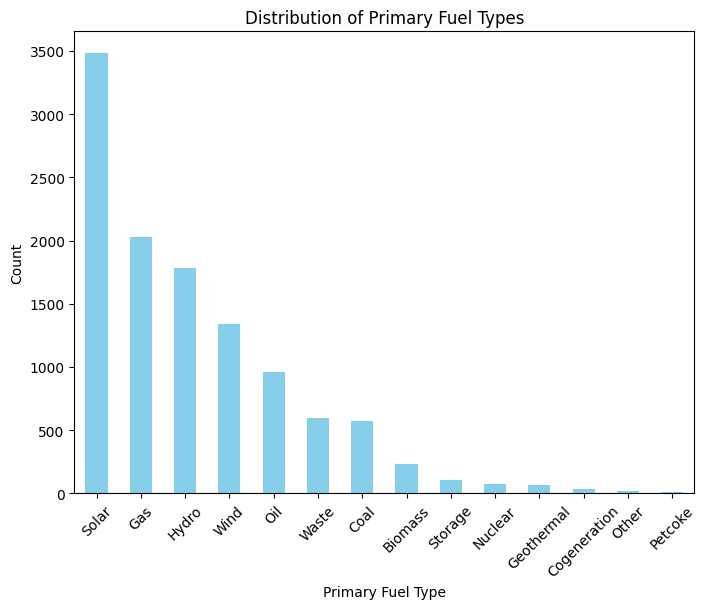

In [22]:
value_counts = df['primary_fuel'].value_counts()
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
#Exploring the data of target variable:
df.capacity_mw.value_counts()

capacity_mw
0.0      2030
5.0       552
1.0       534
2.0       479
1.5       267
         ... 
772.0       1
119.1       1
251.8       1
153.9       1
596.7       1
Name: count, Length: 2304, dtype: int64

In [24]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values for {column}:')
    print(unique_values)
    print('\n')

Unique values for country:
['AUS' 'IND' 'USA']


Unique values for country_long:
['Australia' 'India' 'United States of America']


Unique values for name:
['Adelaide Airport' 'Adelaide Showgrounds' 'Albany Wind Farm' ...
 'Zumbro Solar Garden' 'Zuni' 'eBay - South Jordan']


Unique values for gppd_idnr:
['AUS0000433' 'AUS0000432' 'AUS0000065' ... 'USA0063426' 'USA0000478'
 'USA0059281']


Unique values for capacity_mw:
[1.100e-01 1.000e+00 2.160e+01 ... 2.230e+01 9.682e+02 5.967e+02]


Unique values for latitude:
[-34.9387 -34.9453 -35.0641 ...  44.3195  44.046   39.7373]


Unique values for longitude:
[ 138.5377  138.5882  117.7977 ...  -92.76   -105.017  -112.0478]


Unique values for primary_fuel:
['Solar' 'Wind' 'Oil' 'Coal' 'Gas' 'Hydro' 'Waste' 'Biomass' 'Nuclear' nan
 'Storage' 'Cogeneration' 'Geothermal' 'Petcoke' 'Other']


Unique values for other_fuel1:
[nan 'Oil' 'Cogeneration' 'Gas' 'Waste' 'Solar' 'Coal' 'Biomass' 'Hydro'
 'Storage' 'Other' 'Petcoke' 'Wind']


Unique valu

In [25]:
#removing country and Country_long containing same value, so they are not relavent

df.drop(columns=["country","country_long","wepp_id","estimated_generation_gwh","year_of_capacity_data","generation_data_source"],axis=1,inplace=True)

In [26]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [27]:
df.nunique()

name                   13266
gppd_idnr              13298
capacity_mw             2304
latitude               12385
longitude              12733
primary_fuel              14
other_fuel1               12
other_fuel2               11
other_fuel3                9
commissioning_year      1936
owner                   5877
source                   206
url                      325
geolocation_source         5
generation_gwh_2013     5616
generation_gwh_2014     6306
generation_gwh_2015     6692
generation_gwh_2016     7150
generation_gwh_2017     7630
generation_gwh_2018     8040
generation_gwh_2019     8368
dtype: int64

In [28]:
df.drop(['gppd_idnr','name','url', 'owner'], axis=1, inplace=True)

In [29]:
df.nunique()

capacity_mw             2304
latitude               12385
longitude              12733
primary_fuel              14
other_fuel1               12
other_fuel2               11
other_fuel3                9
commissioning_year      1936
source                   206
geolocation_source         5
generation_gwh_2013     5616
generation_gwh_2014     6306
generation_gwh_2015     6692
generation_gwh_2016     7150
generation_gwh_2017     7630
generation_gwh_2018     8040
generation_gwh_2019     8368
dtype: int64

In [30]:
df.shape

(13298, 17)

After dropping irrelevant columns we found that our dataset now has13298 rows and 17 columns.

In [31]:
#Now checking null values again
df.isnull().sum()

capacity_mw                6
latitude                  78
longitude                 78
primary_fuel            2004
other_fuel1            11670
other_fuel2            13028
other_fuel3            13206
commissioning_year      2644
source                     0
geolocation_source        23
generation_gwh_2013     6128
generation_gwh_2014     5764
generation_gwh_2015     5305
generation_gwh_2016     4597
generation_gwh_2017     4006
generation_gwh_2018     3440
generation_gwh_2019     3520
dtype: int64

There are so many null values so we treat them.

In [32]:
df["capacity_mw"] = df["capacity_mw"].fillna(df["capacity_mw"].mean())          # fill using mean

df["latitude"] = df["latitude"].fillna(df["latitude"].mean())          # fill using mean

df["primary_fuel"] = df["primary_fuel"].fillna(df["primary_fuel"].mode()[0])   # fill using mode

df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])   # fill using mode

df["other_fuel2"] = df["other_fuel2"].fillna(df["other_fuel2"].mode()[0])   # fill using mode

df["other_fuel3"] = df["other_fuel3"].fillna(df["other_fuel3"].mode()[0])   # fill using mode

df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0]) #fill using mode

df["longitude"] = df["longitude"].fillna(df["longitude"].median())   # FIll using median

df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median()) 

In [33]:
#Now checking null values again
df.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
other_fuel3               0
commissioning_year        0
source                    0
geolocation_source        0
generation_gwh_2013    6128
generation_gwh_2014    5764
generation_gwh_2015    5305
generation_gwh_2016    4597
generation_gwh_2017    4006
generation_gwh_2018    3440
generation_gwh_2019    3520
dtype: int64

In [34]:
from sklearn.impute import KNNImputer
import pandas as pd

columns_to_impute = ['generation_gwh_2013','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019']

numeric_columns_to_impute = df[columns_to_impute].apply(pd.to_numeric, errors='coerce')

knn_imp = KNNImputer(n_neighbors=3)
imputed_data = knn_imp.fit_transform(numeric_columns_to_impute)

df[columns_to_impute] = imputed_data

print(df[columns_to_impute])

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0               563.383222           635.739731           616.801877   
1               563.383222           635.739731           616.801877   
2                89.595278           102.642778            96.555556   
3               563.383222           635.739731           616.801877   
4               563.383222           635.739731           616.801877   
...                    ...                  ...                  ...   
13293             3.671000             2.460150             2.489000   
13294             3.417000             5.656333             2.031259   
13295           563.383222           635.739731           616.801877   
13296             0.000000             0.000000             0.000000   
13297            12.968000            51.276000            71.505000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0               561.784508           532.472482           513.6

In [35]:
#Now checking null values again
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
other_fuel2            0
other_fuel3            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

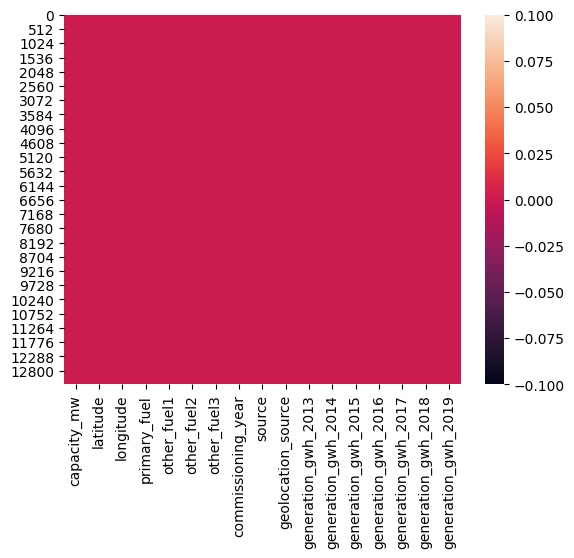

In [36]:
#plotting missing values in heatmap is there is present
sns.heatmap(df.isnull())
plt.show()

All Null values treated

In [37]:
df.sample(10)

capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
1720           0.0   45.3997   -94.7231        Solar         Oil         Gas   
8031         234.0   35.2269  -119.6294          Gas         Oil         Gas   
5238          33.2   38.8681   -91.9478          Gas         Oil         Gas   
4985         288.8   41.8508   -87.6533          Oil         Oil         Gas   
11877         80.0   37.8271  -113.1371        Solar         Oil         Gas   
12344          1.9   42.8591  -100.5924         Wind         Oil         Gas   
2738         985.0   35.0786   -81.5750          Gas         Oil         Gas   
13279          1.6   35.0772  -118.3811         Wind         Oil         Gas   
3796           5.0   36.3669   -78.6261        Solar         Oil         Gas   
3459           4.0   45.4134   -92.6830        Solar         Oil         Gas   

      other_fuel3  commissioning_year                                  source  \
1720          Gas         2008.000000  U.S. Energy Information Administration   
8031          Gas         1989.000000  U.S. Energy Information Administration   
5238          Gas         1971.728916  U.S. Energy Information Administration   
4985          Gas         1968.000000  U.S. Energy Information Administration   
11877         Gas         2017.000000  U.S. Energy Information Administration   
12344         Gas         2014.000000  U.S. Energy Information Administration   
2738          Gas         2000.400000  U.S. Energy Information Administration   
13279         Gas         1986.000000  U.S. Energy Information Administration   
3796          Gas         2016.000000  U.S. Energy Information Administration   
3459          Gas         2017.000000  U.S. Energy Information Administration   

                           geolocation_source  generation_gwh_2013  \
1720   U.S. Energy Information Administration           563.383222   
8031   U.S. Energy Information Administration          1341.230000   
5238   U.S. Energy Information Administration             0.000000   
4985   U.S. Energy Information Administration             0.716000   
11877  U.S. Energy Information Administration             3.382739   
12344  U.S. Energy Information Administration             5.606815   
2738   U.S. Energy Information Administration             0.000000   
13279  U.S. Energy Information Administration             1.585333   
3796   U.S. Energy Information Administration             1.010926   
3459   U.S. Energy Information Administration           162.301333   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
1720            635.739731           616.801877           561.784508   
8031           1174.070000          1049.474000           910.688000   
5238              0.448000             0.000000             0.280000   
4985              1.011000             0.587000             2.548000   
11877             3.928167            14.974833             8.739000   
12344             2.089000             6.206000             7.023000   
2738            388.805000           688.671000          1256.982041   
13279             1.735667             1.209000             1.704000   
3796              1.028000             0.957000             0.596000   
3459              3.091667             0.000000             0.000000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  
1720            532.472482           513.679016           421.938592  
8031            826.514000           850.069000           806.368000  
5238              0.000000             0.000000             0.205000  
4985              5.080000             0.618000             2.543000  
11877           220.677000           225.931000           216.718000  
12344             5.898000             6.247000             5.807000  
2738            402.646998          2084.851014           425.155997  
13279             1.629000             1.877000             1.659000  
3796              9.698000     

## Now changing the column "commisioning_year" to "power plant age".

In [38]:
df['Powerplant_age']=2022-df['commissioning_year']
df.drop('commissioning_year',axis=1,inplace=True)
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0         0.11  -34.9387   138.5377        Solar         Oil         Gas   
1         1.00  -34.9453   138.5882        Solar         Oil         Gas   
2        21.60  -35.0641   117.7977         Wind         Oil         Gas   
3         0.24  -23.7966   133.8971        Solar         Oil         Gas   
4         4.00  -34.5509   138.7659          Oil         Oil         Gas   

  other_fuel3                                             source  \
0         Gas  Australian Renewable Energy Mapping Infrastruc...   
1         Gas  Australian Renewable Energy Mapping Infrastruc...   
2         Gas  Australian Renewable Energy Mapping Infrastruc...   
3         Gas  Australian Renewable Energy Mapping Infrastruc...   
4         Gas  Australian Renewable Energy Mapping Infrastruc...   

                                  geolocation_source  generation_gwh_2013  \
0  Australian Renewable Energy Mapping Infrastruc...           563.383222   
1  Australian Renewable Energy Mapping Infrastruc...           563.383222   
2  Australian Renewable Energy Mapping Infrastruc...            89.595278   
3  Australian Renewable Energy Mapping Infrastruc...           563.383222   
4  Australian Renewable Energy Mapping Infrastruc...           563.383222   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           635.739731           616.801877           561.784508   
1           635.739731           616.801877           561.784508   
2           102.642778            96.555556            95.872778   
3           635.739731           616.801877           561.784508   
4           635.739731           616.801877           561.784508   

   generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0           532.472482           513.679016           421.938592   
1           532.472482           513.679016           421.938592   
2            85.900278            92.682222           321.705333   
3           532.472482           513.679016           421.938592   
4           532.472482           513.679016           421.938592   

   Powerplant_age  
0            11.0  
1            14.0  
2            14.0  
3            18.0  
4             7.0

In [39]:
# Statistical summary of dataset
df.describe()

capacity_mw      latitude     longitude  generation_gwh_2013  \
count  13298.000000  13298.000000  13298.000000         13298.000000   
mean     117.738717     35.053213    -73.873706           456.251163   
std      347.090703     15.398830     62.692711          1578.576312   
min        0.000000    -42.888300   -171.712400          -947.600000   
25%        1.500000     33.914250   -104.583400             3.092171   
50%        5.500000     38.330650    -87.346000            37.311500   
75%       52.975000     42.166025    -75.535425           563.383222   
max     6809.000000    425.246100    153.434100         31431.080000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count         13298.000000         13298.000000         13298.000000   
mean            501.999116           503.161147           484.110569   
std            1691.700672          1700.886814          1688.505938   
min            -989.619000          -864.428000          -768.620000   
25%               3.006208             2.600917             2.543750   
50%              32.826500            29.600000            28.422000   
75%             635.739731           616.801877           561.784508   
max           32320.917000         32525.595000         32377.477000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count         13298.000000         13298.000000         13298.000000   
mean            481.819678           483.293476           511.898894   
std            1698.397797          1711.386477          1713.101815   
min            -934.944000          -982.622000          -780.339000   
25%               2.766000             2.790000             4.049500   
50%              29.618806            28.047000            38.264000   
75%             532.472482           513.679016           421.938592   
max           35116.000000         35136.000000         31920.368000   

       Powerplant_age  
count    13298.000000  
mean        21.863591  
std         21.851731  
min          2.000000  
25%          8.000000  
50%         14.000000  
75%         28.500000  
max        126.000000

1. The counts of columns are same which means there are no missing values present in the dataset.
2. The mean is more than the median(50%) in all the columns which means they are skewed to right except latitude .
3. The median is little greater than the mean in the column latitude which means it is skewed to the left.
4. From the difference between maximum and 75% percentile we can understand that there are huge outliers present in most of the columns, we will remove them using appropriate methods before building our model.
5. There is huge difference in mean and standard deviation.


## Sepration of categorical and numerical columns.

In [40]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'source', 'geolocation_source']


In [41]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'Powerplant_age']


## Visualization of Data

### Univariate Analysis Plotting

other_fuel1
Oil             12656
Gas               351
Coal               71
Waste              63
Storage            43
Solar              30
Hydro              20
Biomass            19
Other              17
Petcoke            15
Wind                7
Cogeneration        6
Name: count, dtype: int64


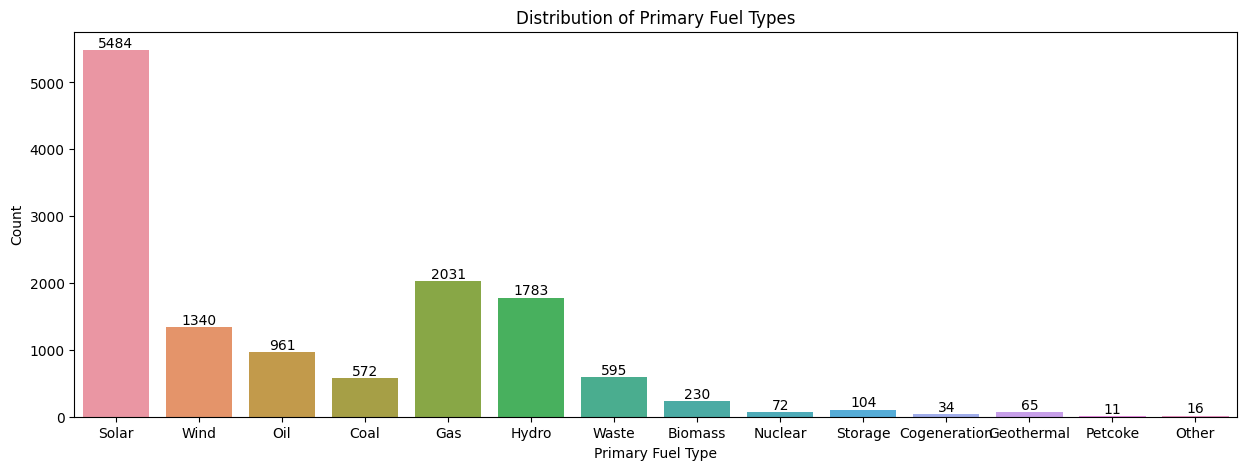

In [119]:
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='primary_fuel')
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

As per above countplot we can say that Solar & Gas are the highly used primary fuels, followed by Hydro & wind, followed by waste & Biomass.

Less used fuels are Petcoke & others.

other_fuel1
Oil             12656
Gas               351
Coal               71
Waste              63
Storage            43
Solar              30
Hydro              20
Biomass            19
Other              17
Petcoke            15
Wind                7
Cogeneration        6
Name: count, dtype: int64


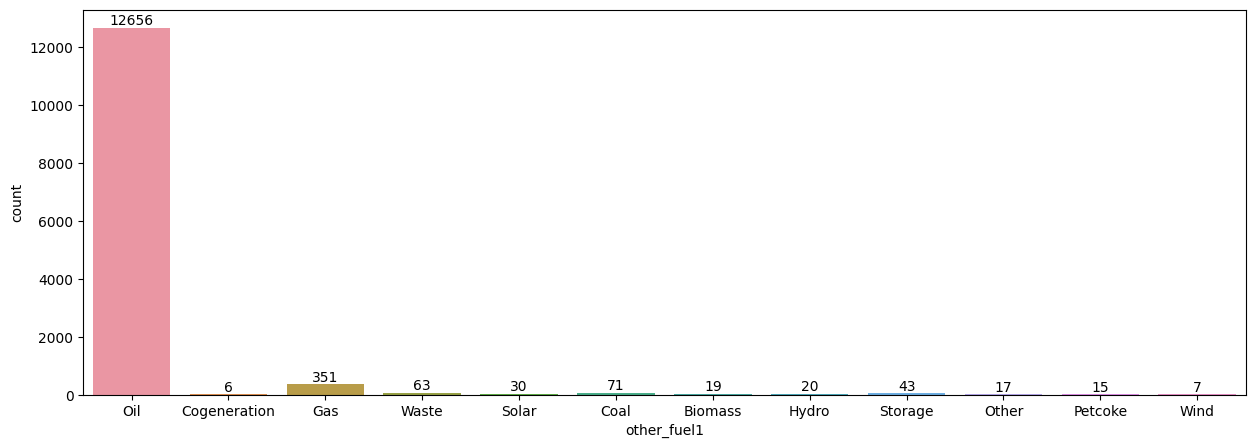

In [43]:
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='other_fuel1')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

As per above countplot we can see that oil is the fuel used at great number.

Gas and Coal are 2nd and 3rd most used but not at level of oil.

source
U.S. Energy Information Administration                11833
Central Electricity Authority                           519
Australian Renewable Energy Mapping Infrastructure      512
CDM                                                     124
CEPR                                                     14
                                                      ...  
Kjs Ahluwalia group                                       1
Ym Ssk ltd                                                1
Maral Overseas ltd                                        1
Gm Energy ltd                                             1
Windmar Renewable Energy                                  1
Name: count, Length: 206, dtype: int64


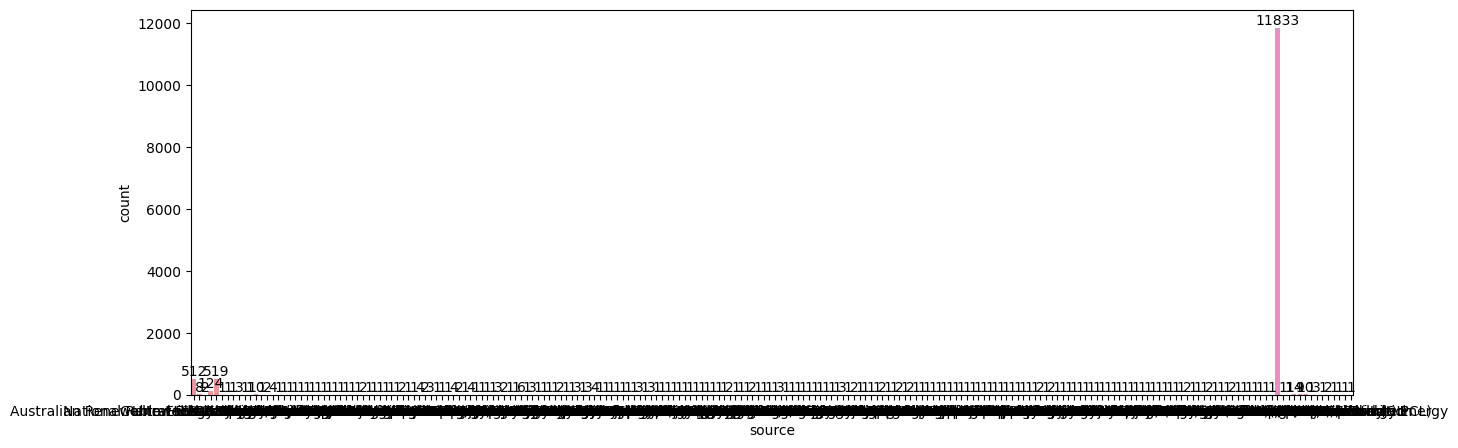

In [44]:
print(df["source"].value_counts())
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='source')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

As per above plot we can see that source of fuel at "U.S. Energy Information Administration" is high.

geolocation_source
U.S. Energy Information Administration                11856
WRI                                                     807
Australian Renewable Energy Mapping Infrastructure      512
Industry About                                          119
National Renewable Energy Laboratory                      4
Name: count, dtype: int64


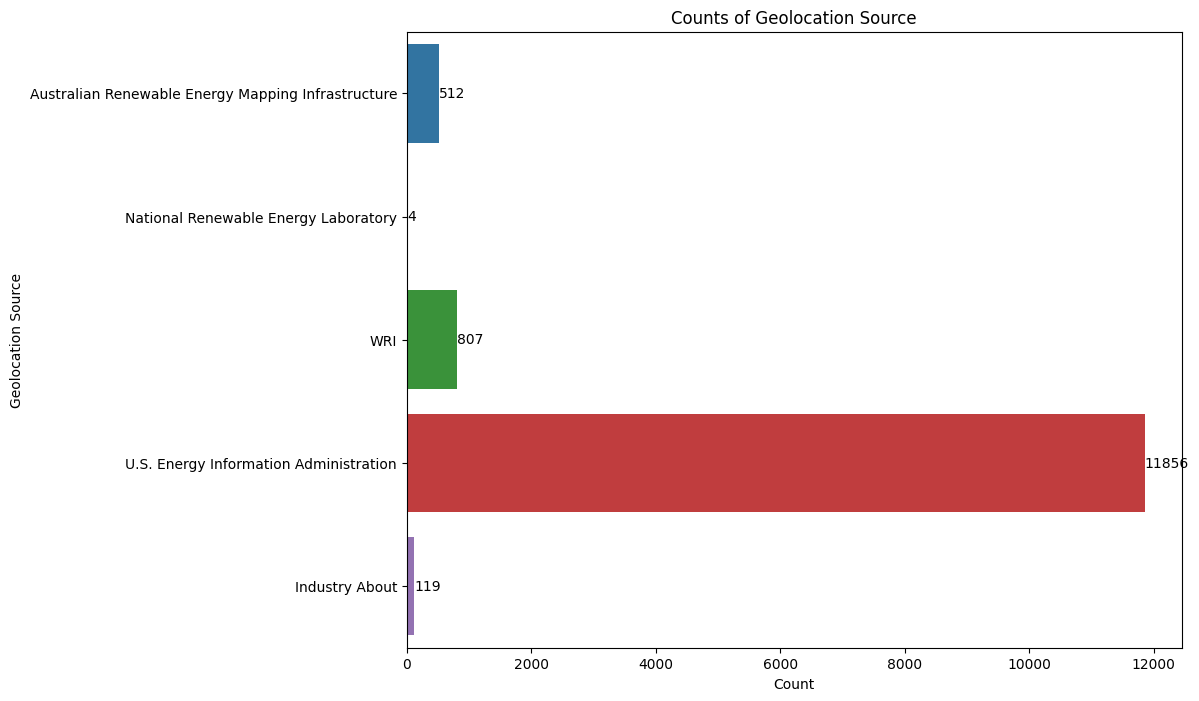

In [45]:
print(df["geolocation_source"].value_counts())

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, y='geolocation_source')
plt.title('Counts of Geolocation Source')
plt.xlabel('Count')
plt.ylabel('Geolocation Source')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center')

plt.show()

As per above pie chart we can se that the count of U.S. Energy Information Administration is again high with 11,856 in case of "geolocation_source"

### Bivarient plotting

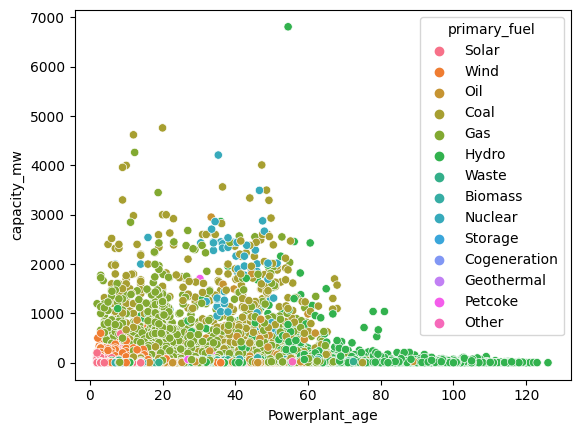

In [40]:
sns.scatterplot(x = "Powerplant_age", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

We can see that coal, hydro and Gas fuels are used higher numbers.

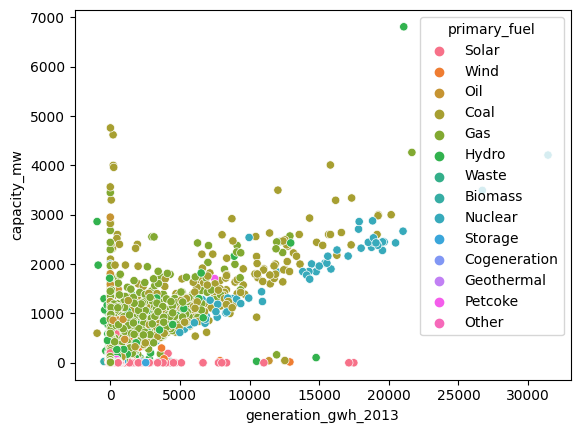

In [42]:
sns.scatterplot(x = "generation_gwh_2013", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

We can see the linear relationship between the feature and the label. Here the electricity generation reported for the year 2013 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

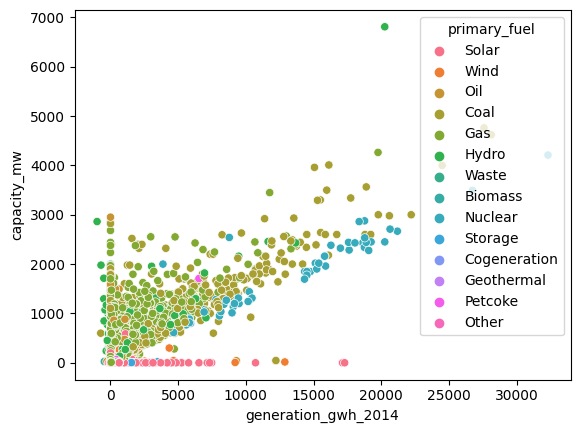

In [44]:
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

We can see the linear relationship between the feature and the label. Here the electricity generation reported for the year 2014 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

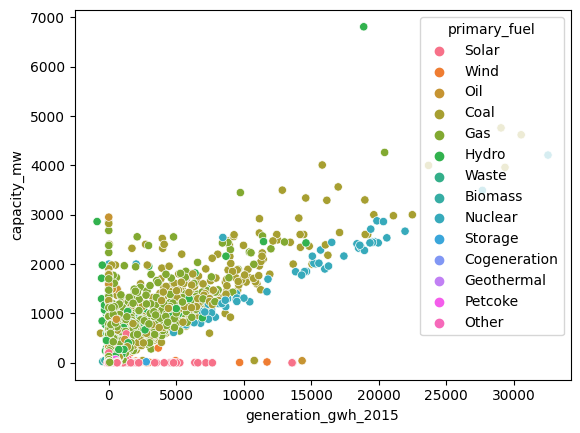

In [46]:
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

We can noticed the linear relationship between the feature and the label. Here the electricity generation reported for the year 2015 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately

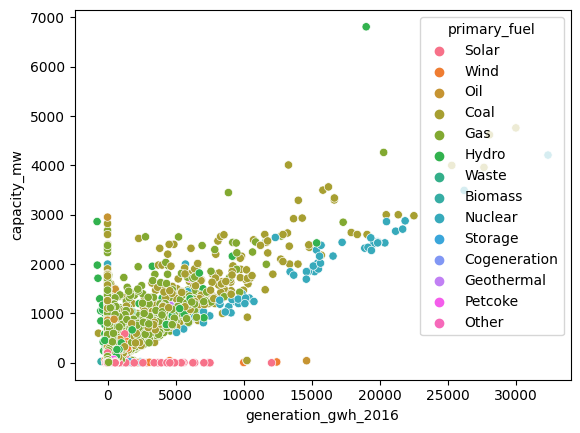

In [47]:
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

Same as in case of year 2014 & 2015, generation_gwh increases then capacity also increases.

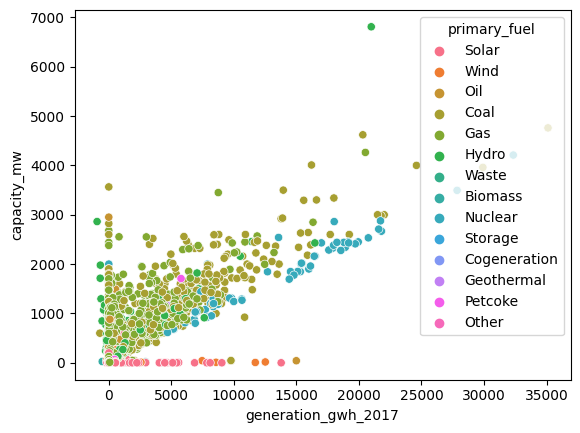

In [48]:
sns.scatterplot(x = "generation_gwh_2017", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

Capacity of the plant is increasing moderately with respect to the generation of year 2017

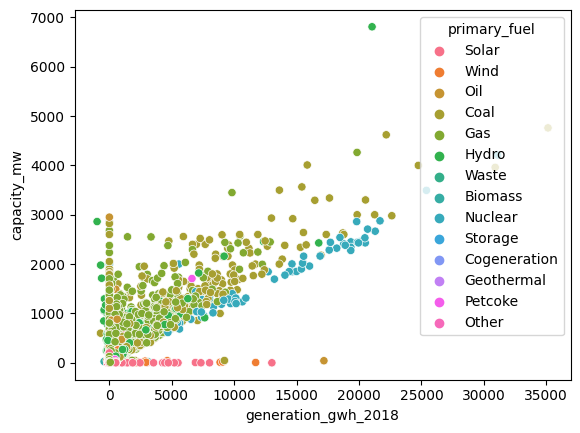

In [49]:
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

Capacity of the plant is increasing moderately with respect to generation in year 2018

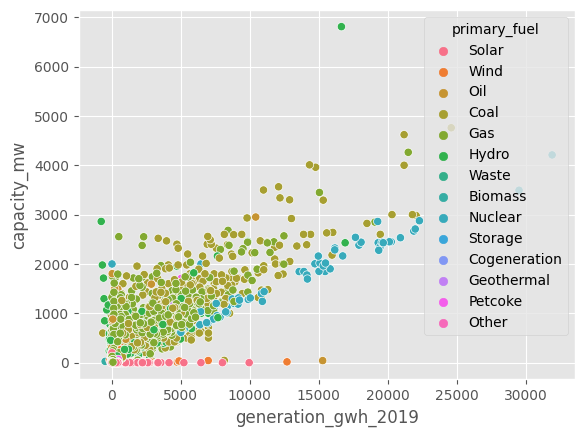

In [55]:
sns.scatterplot(x = "generation_gwh_2019", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

Capacity of the plant is increasing moderately with respect to generation in year 2019

### Bar Plot

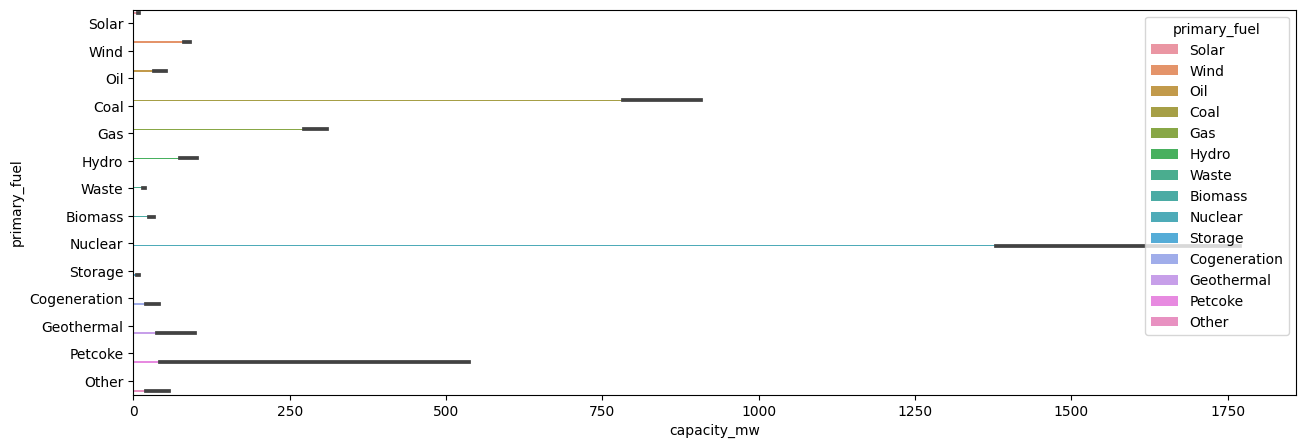

In [104]:
#Lets check the relation between primary_fuel and capacity_mw

plt.figure(figsize = (15,5))
sns.barplot(x = "capacity_mw", y = "primary_fuel", data = df,hue='primary_fuel')
plt.show()

As per above bar plot we can see that nuclear has the highest capacity, followed by coal and petcoke.

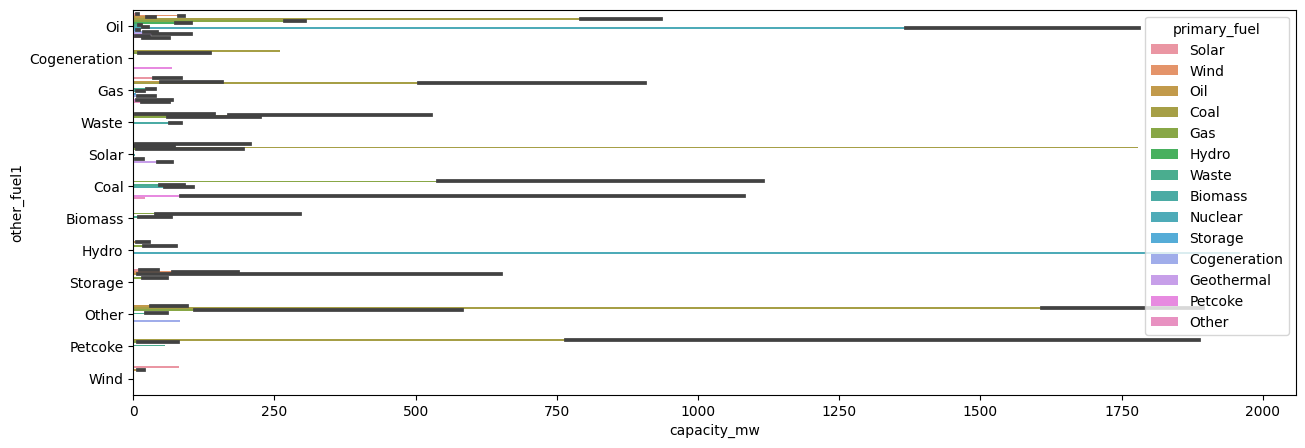

In [105]:
#Lets check the relation between other_fuel1 and capacity_mw

plt.figure(figsize = (15,5))
sns.barplot(x = "capacity_mw", y = "other_fuel1", data = df,hue='primary_fuel')
plt.show()

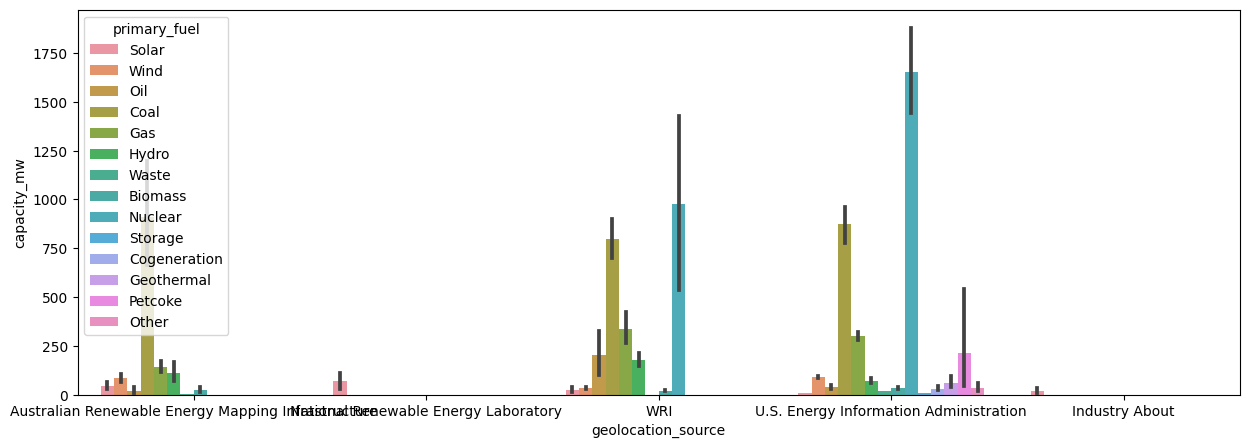

In [52]:
#Lets check the relation between geolocation_source and capacity_mw

plt.figure(figsize = (15,5))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df,hue='primary_fuel')
plt.show()

The capacity of geolocation source "U.S. Energy Information Administration" is maximum which has capacity more than 1000 mega watts. The geolacation source "Industry About" has less capacity. In U.S. Energy Information Administration all sources of power is used.

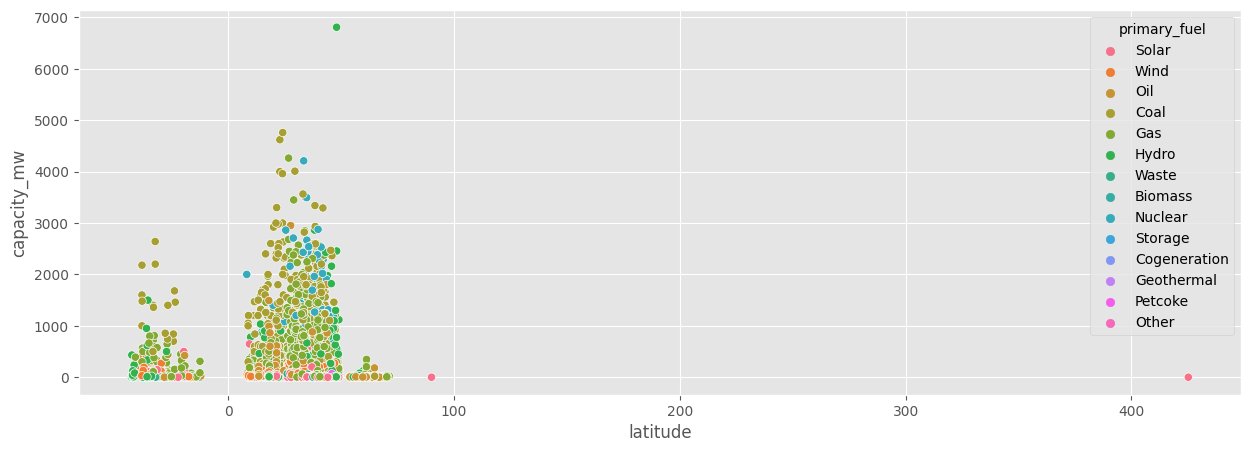

In [53]:
# Let's check how the capacity is reated to latitude of the power plant.
plt.figure(figsize=[15, 5])
plt.style.use('ggplot')
sns.scatterplot(data=df, x='latitude', y='capacity_mw', hue='primary_fuel')
plt.show()

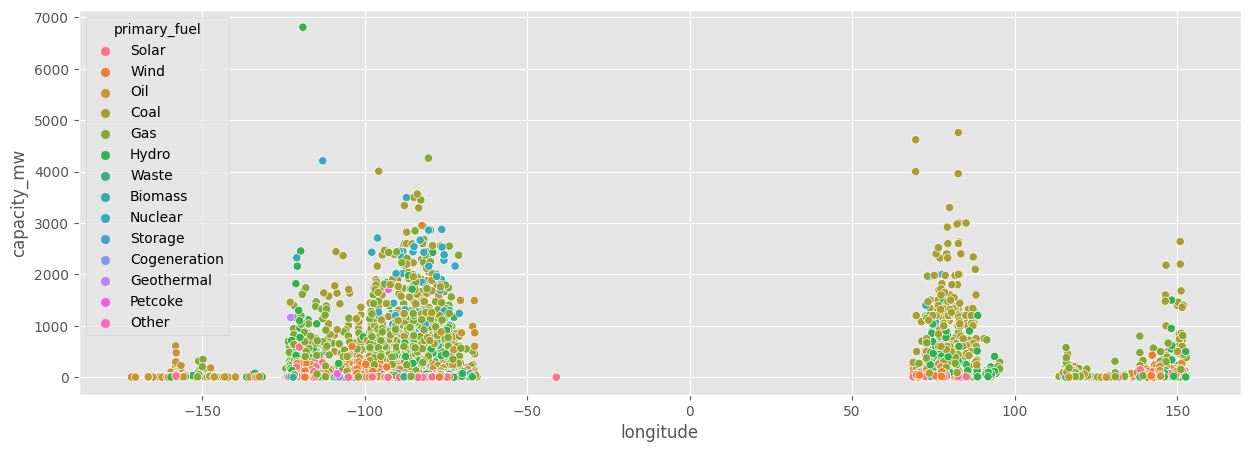

In [54]:
# Let's check how the capacity is reated to longitude of the power plant.
plt.figure(figsize=[15, 5])
plt.style.use('ggplot')
sns.scatterplot(data=df, x='longitude', y='capacity_mw', hue='primary_fuel')
plt.show()

### Line Plot


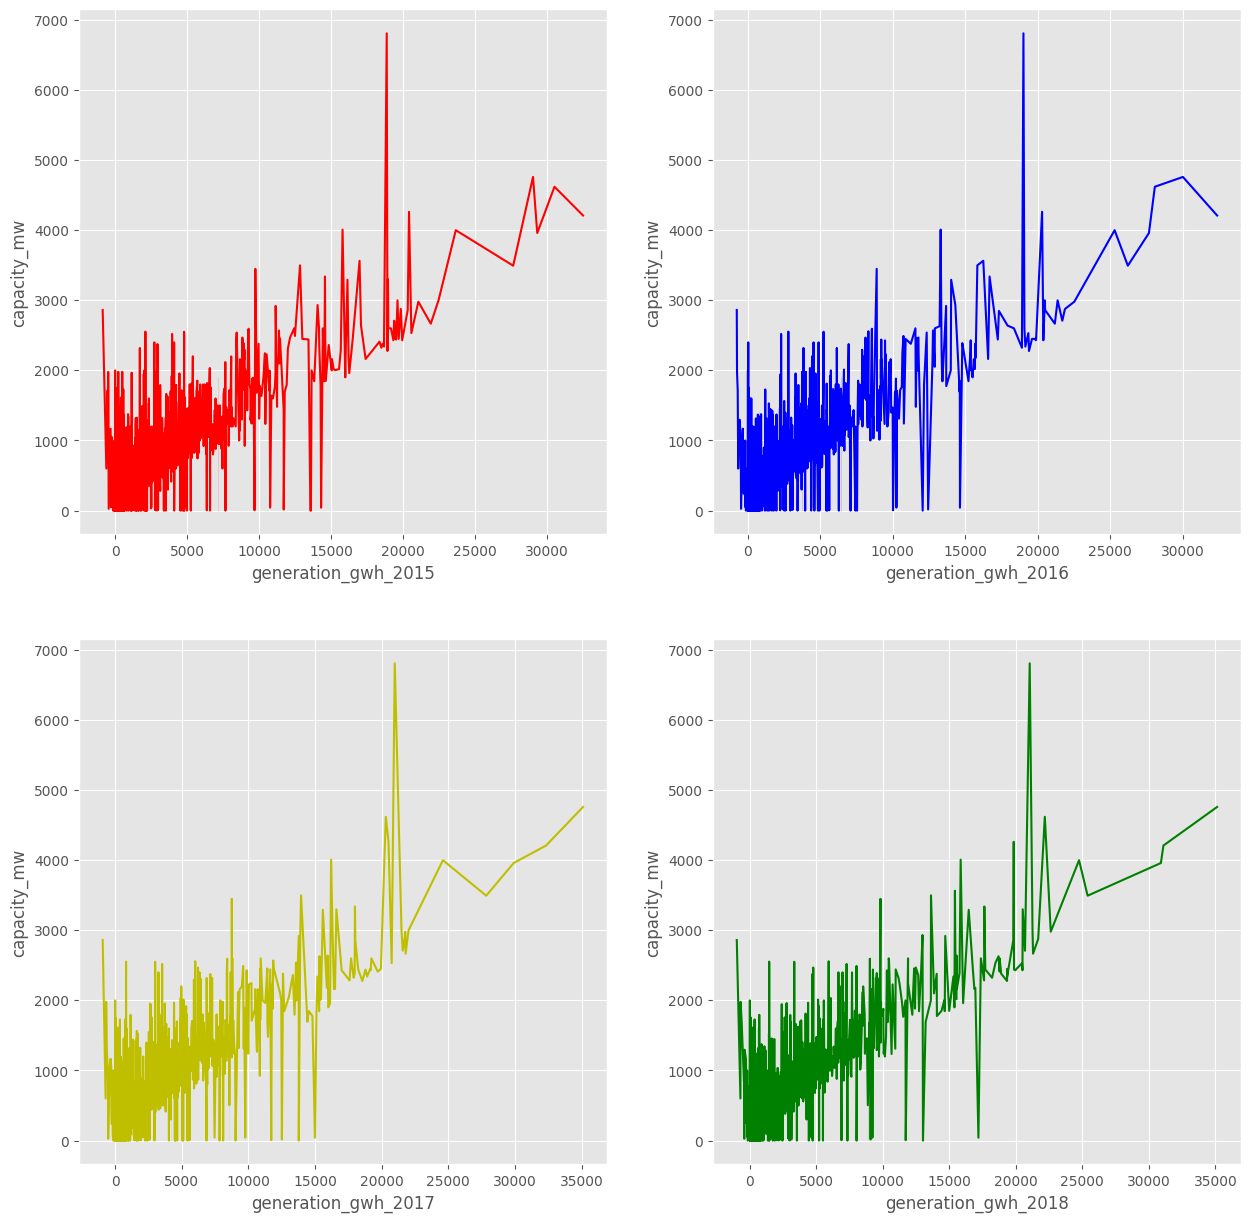

In [56]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

# Checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=df,color="r")

# Checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=df,color="b")

# Checking attrition level in Monthlyrate
sns.lineplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=df,color="y")

# Checking attrition level in Monthlyincome
sns.lineplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="g")
plt.show()


As per above line plots we can see that when power generation is increasing capacity of the plant is also increasing in the year 2015,2016,2017,2018.

There is a positive linear relationship between the capacity and the electricity generation.

### Distribution plot

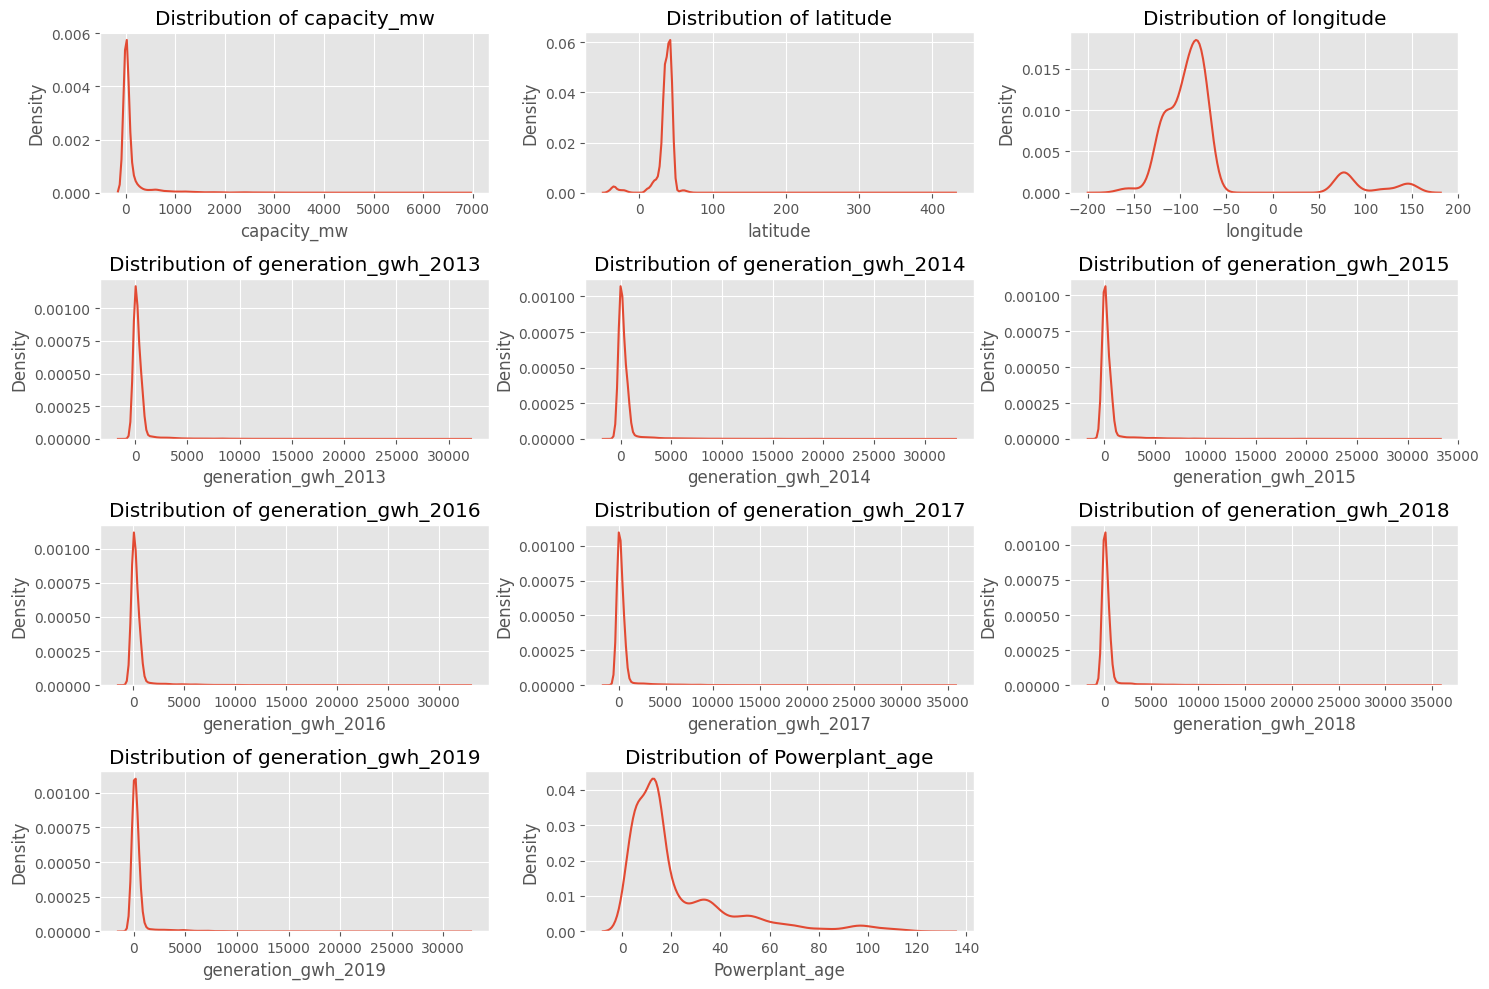

In [57]:
plt.figure(figsize=(15, 10))

# Select only numeric columns for plotting
numeric_columns = df.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.subplot(4, 3, numeric_columns.get_loc(column) + 1) 
    sns.distplot(df[column], hist=False)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

### Pairplot

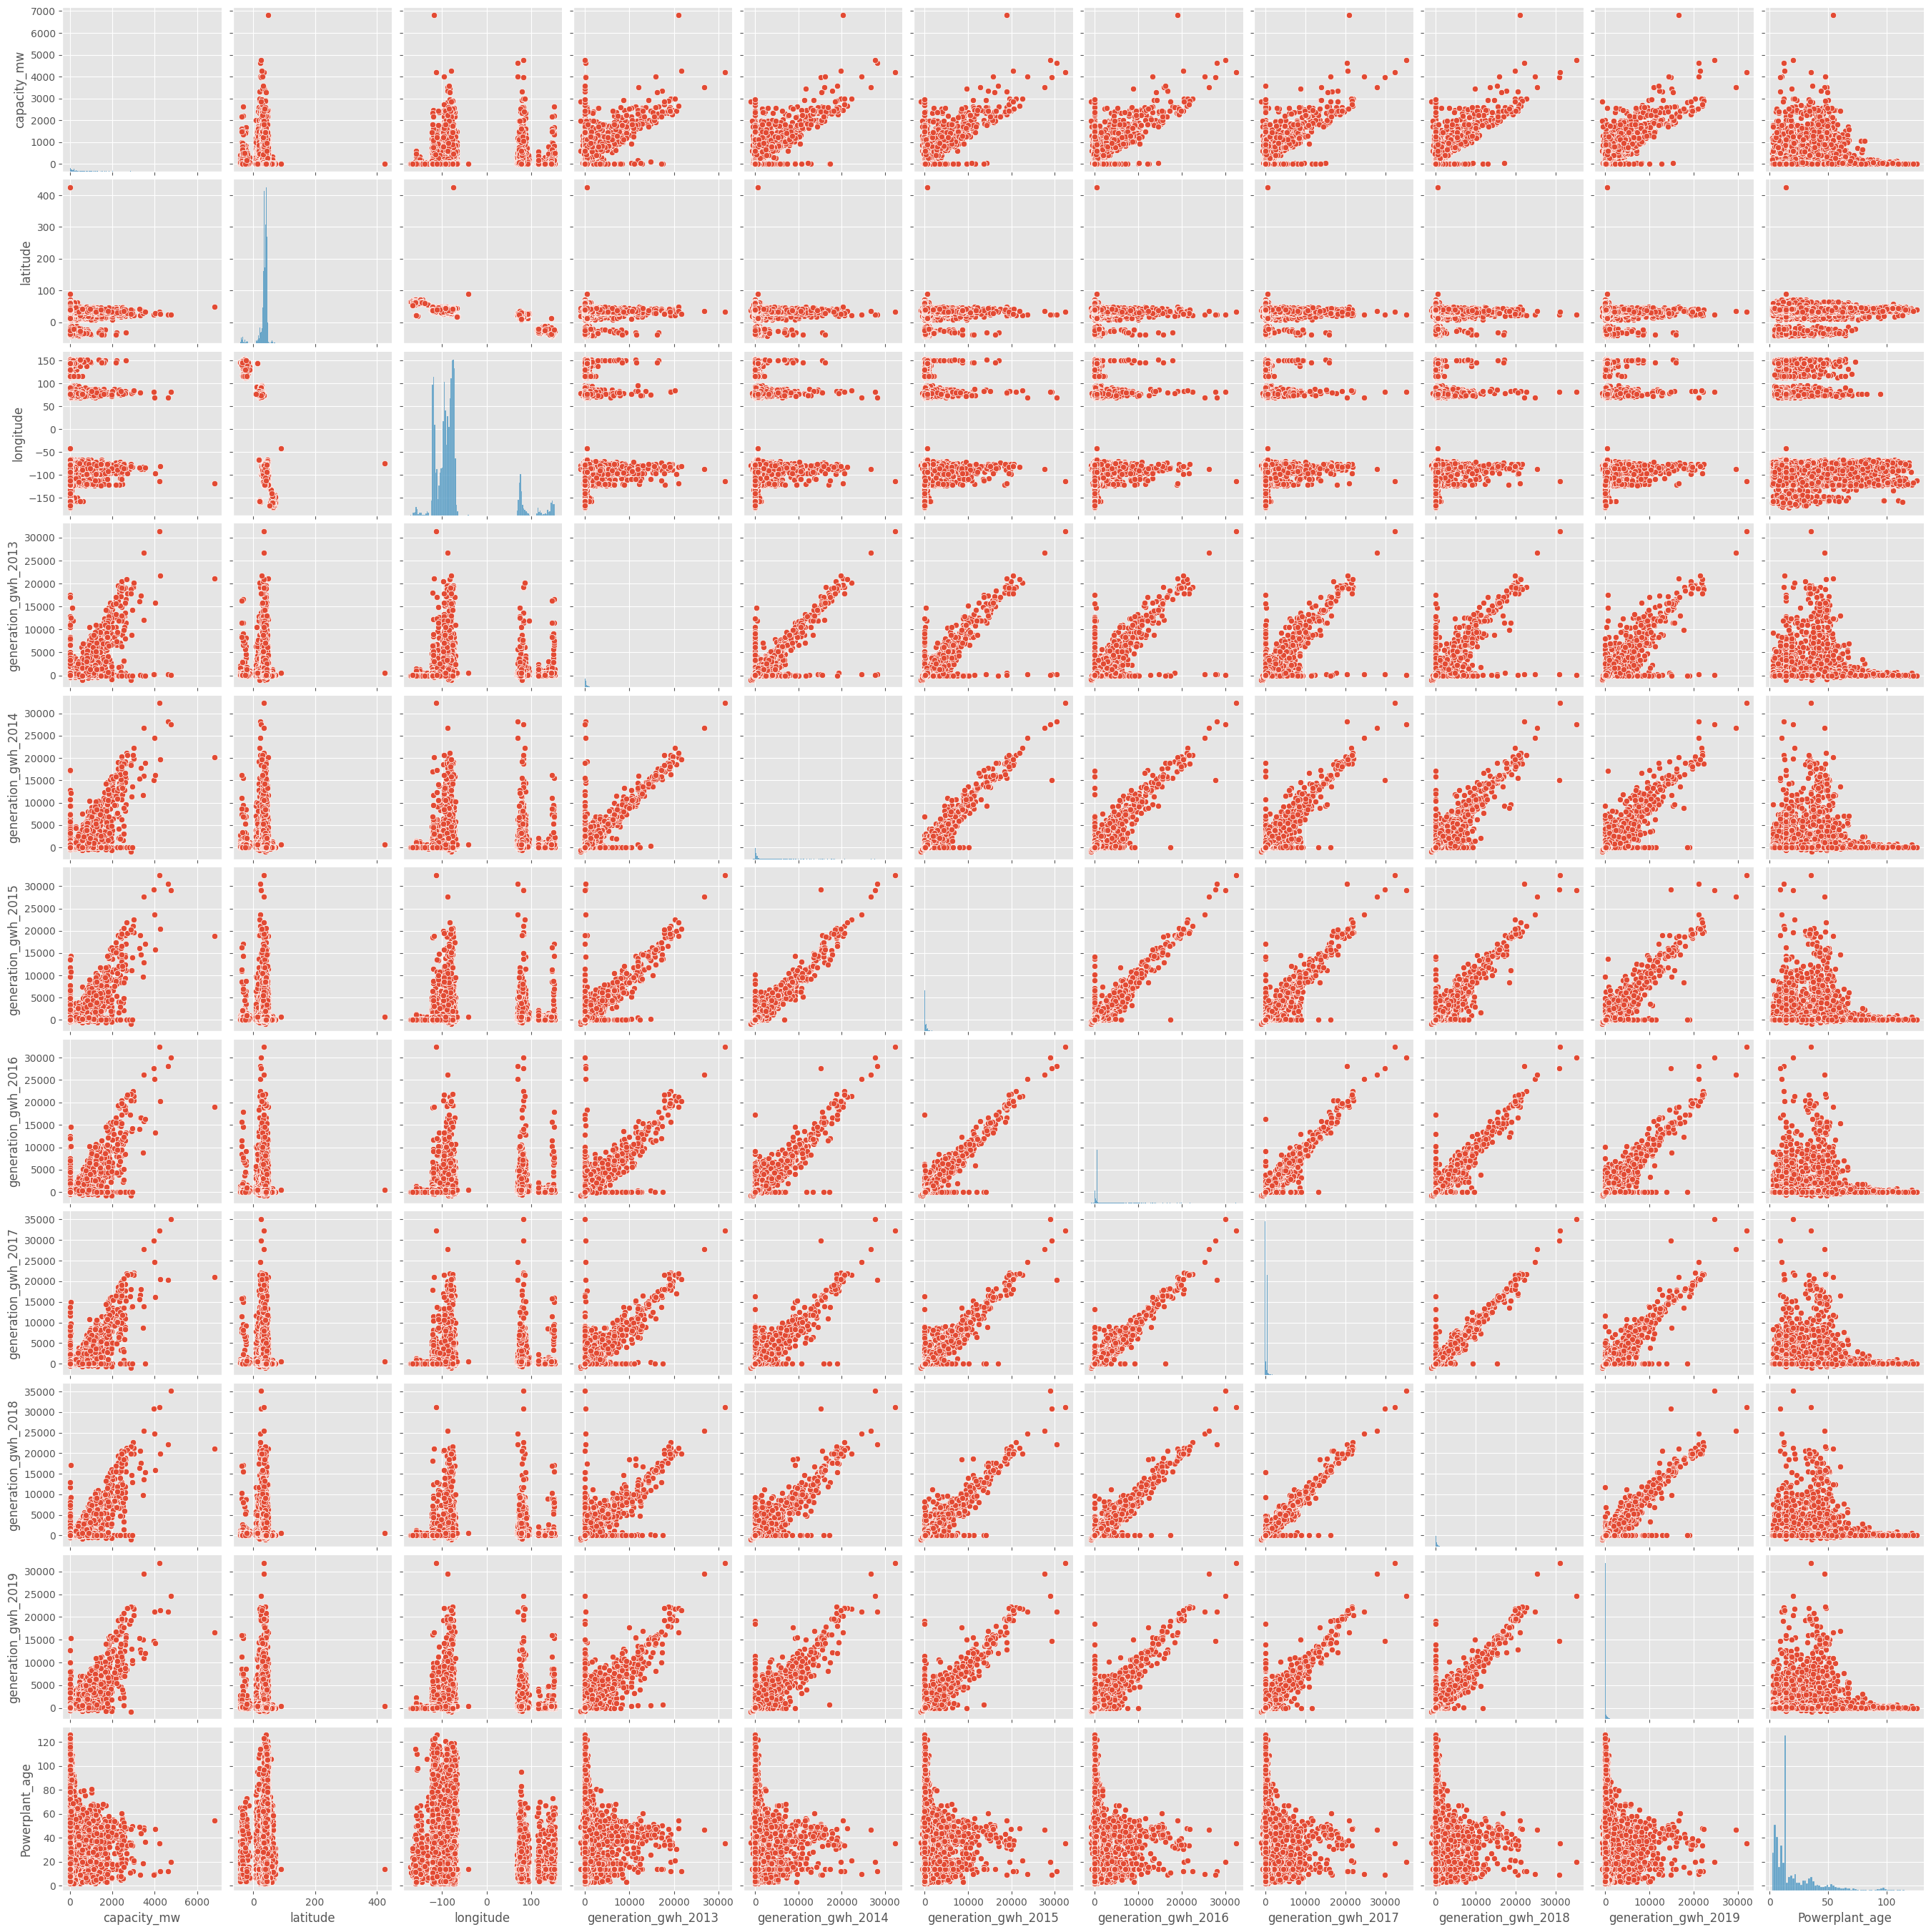

In [58]:
# Checking the pairwise relation between the features.
sns.pairplot(df)
plt.show()

From the above pairplot , we conclude that there are linear relationship between few variable, let us check multicollinearity to avoid later problem

## Checking for outliers:

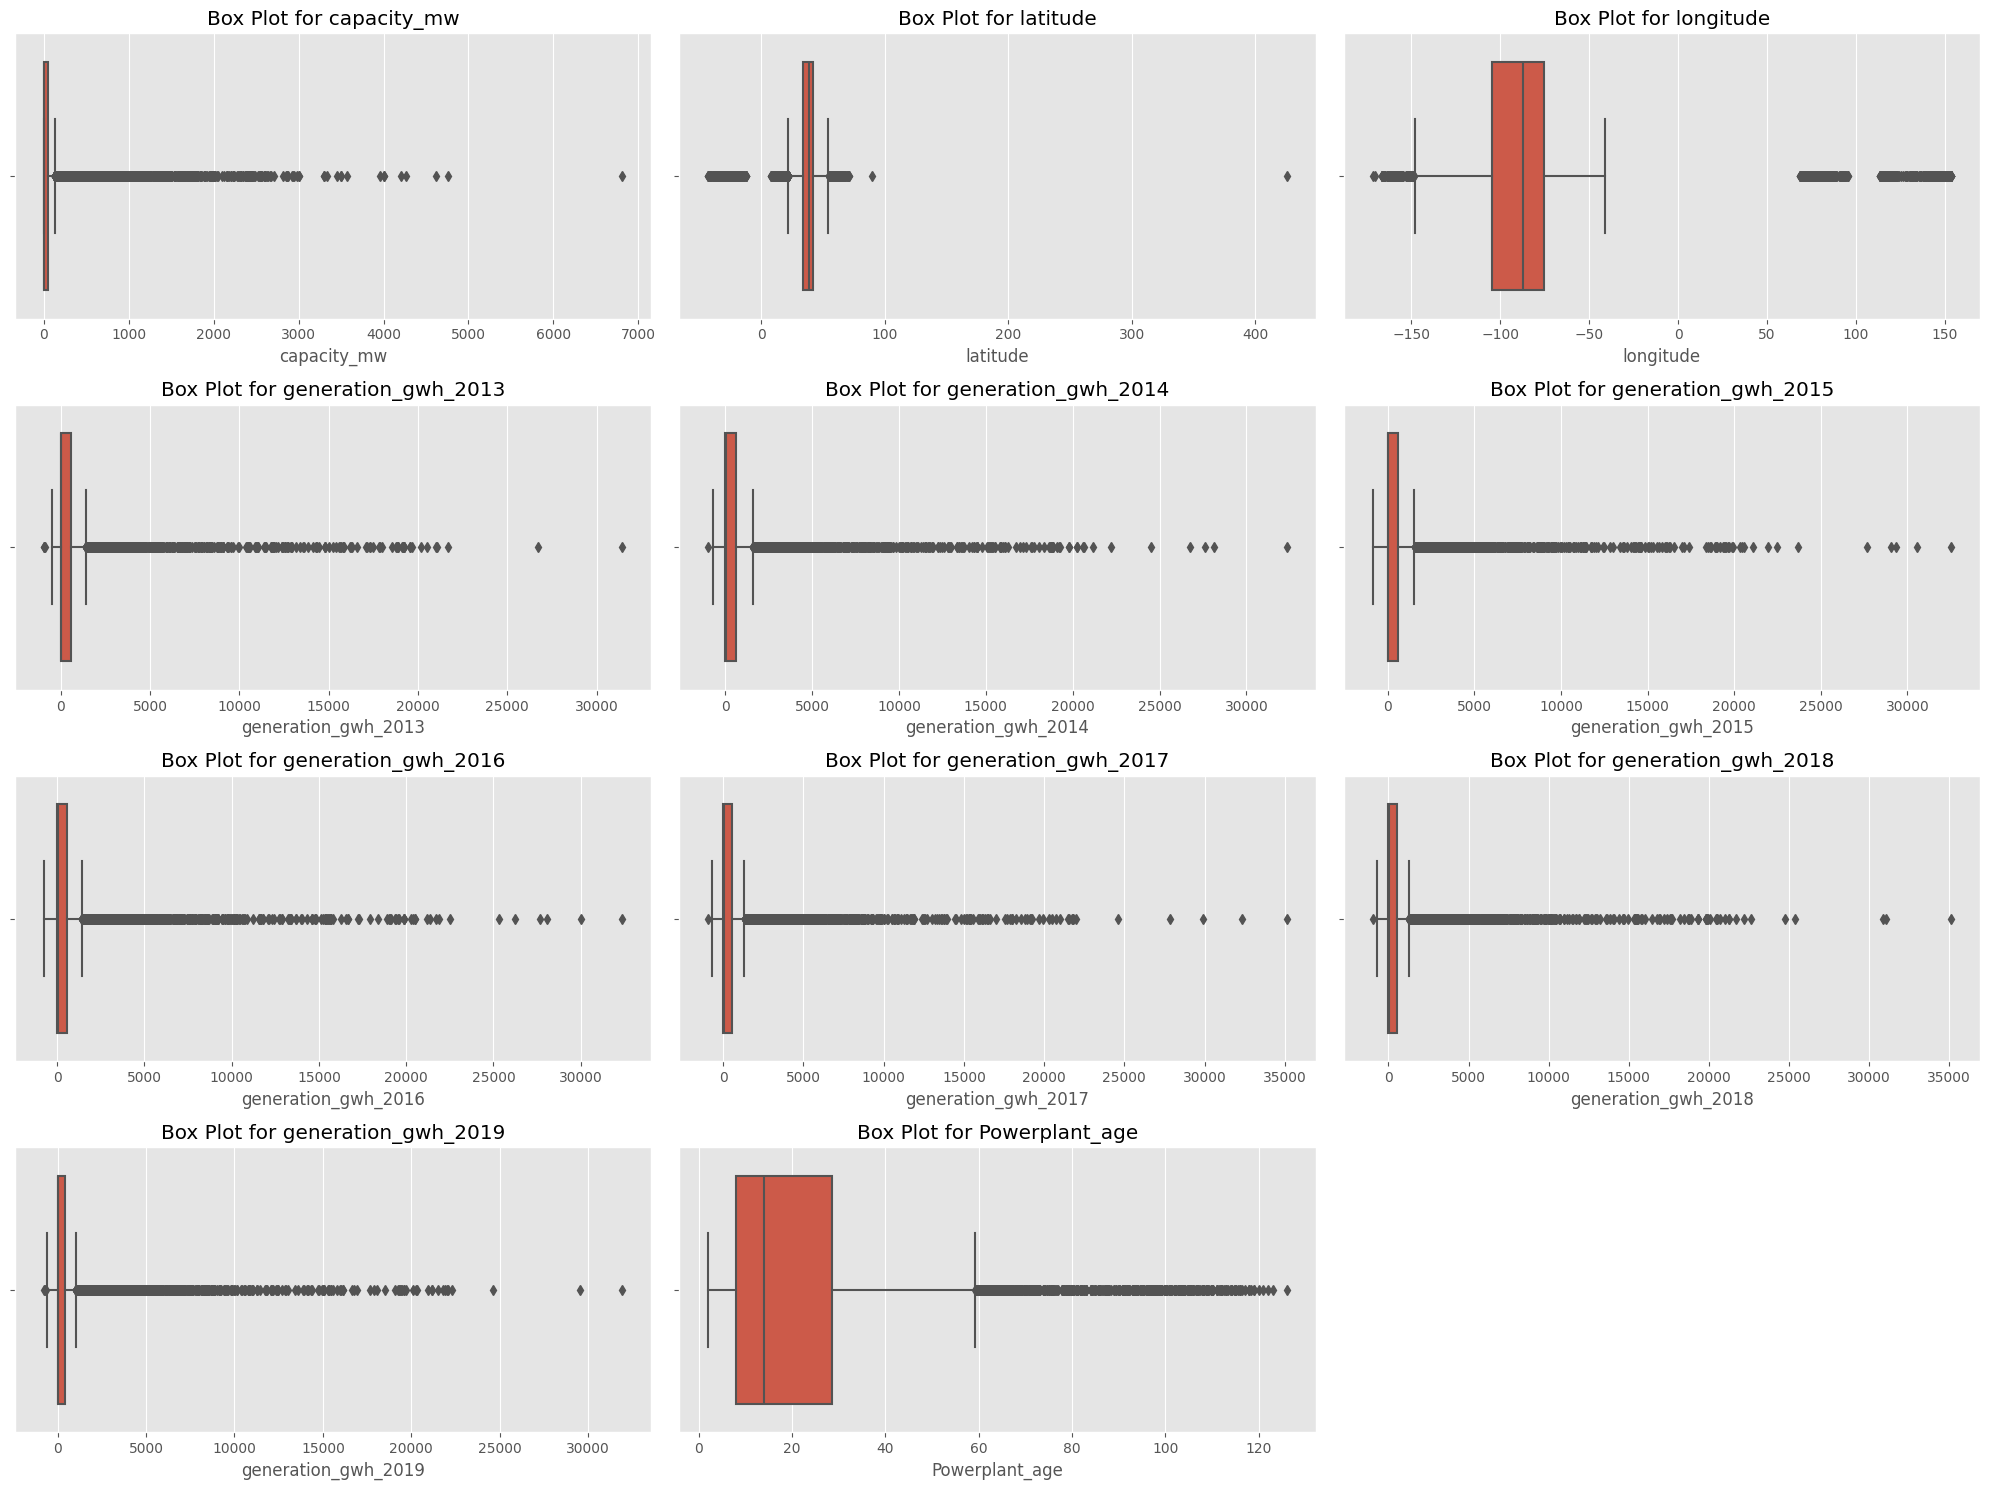

In [59]:
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 15)) 

for column in numeric_columns:
    plt.subplot(4, 3, numeric_columns.get_loc(column) + 1) 
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

All features contain outliers

### Removing outliers using Zscore method

In [106]:
from scipy import stats

threshold = 3

# Columns containing outliers
columns = df[['latitude','longitude','generation_gwh_2013' ,'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_gwh_2019', 'Powerplant_age']]

z = np.abs(stats.zscore(columns))
outlier_indices = np.where(z > threshold)
new_df = df.drop(index=outlier_indices[0])

In [107]:
new_df["capacity_mw"]

512        2.5
513       98.0
514       39.2
515      135.0
517      250.0
         ...  
13293      3.4
13294      1.0
13295      0.0
13296      0.0
13297      9.8
Name: capacity_mw, Length: 11974, dtype: float64

In [108]:
df.shape

(13298, 17)

In [109]:
new_df.shape

(11974, 17)

In [120]:
original_rows = df.shape[0]
new_rows = new_df.shape[0]

data_loss_percentage = ((original_rows - new_rows) / original_rows) * 100

# Print the results
print(f"Original data rows: {original_rows}")
print(f"Rows after removing outliers: {new_rows}")
print(f"Data loss percentage: {data_loss_percentage:.2f}%")

Original data rows: 13298
Rows after removing outliers: 11974
Data loss percentage: 9.96%


After using Z-Score method for removing outliers, we are losing 9.96% of data from our dataset.

## Encoding

In [110]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

primary_fuel  other_fuel1  source  geolocation_source
512              10            5     113                   1
513               1            5     184                   3
514              13            5      21                   3
515               3            5      23                   3
517               1            5      23                   3
...             ...          ...     ...                 ...
13293            13            5     181                   2
13294            10            5     181                   2
13295            10            5     181                   2
13296            10            5     181                   2
13297             3            5     181                   2

[11974 rows x 4 columns]

In [111]:
new_df["capacity_mw"]

512        2.5
513       98.0
514       39.2
515      135.0
517      250.0
         ...  
13293      3.4
13294      1.0
13295      0.0
13296      0.0
13297      9.8
Name: capacity_mw, Length: 11974, dtype: float64

## Checking Skewness

In [112]:
numeric_columns = new_df.select_dtypes(include=['number'])

skewness = numeric_columns.skew()

print(skewness)

capacity_mw            4.661674
latitude              -0.713458
longitude              2.642122
primary_fuel          -0.567706
other_fuel1            1.094679
source                -3.831875
geolocation_source    -1.118105
generation_gwh_2013    4.450166
generation_gwh_2014    4.263738
generation_gwh_2015    4.363189
generation_gwh_2016    4.690848
generation_gwh_2017    4.650765
generation_gwh_2018    4.716021
generation_gwh_2019    4.761061
Powerplant_age         1.641854
dtype: float64


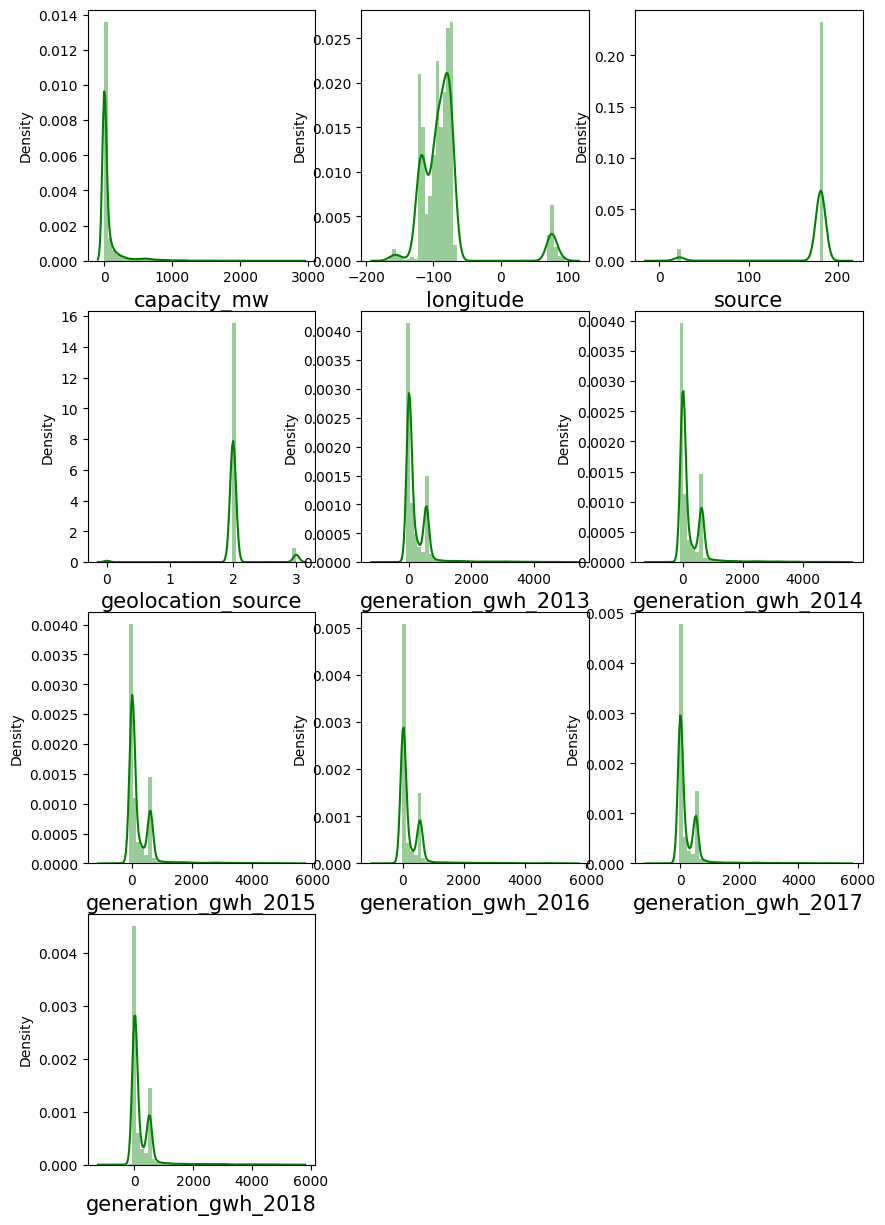

In [113]:
feature=new_df[["capacity_mw",'longitude','source','geolocation_source','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','Powerplant_age']]

#Visualizing

plt.figure(figsize = (10,15))
plotnumber = 1

for column in feature:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(feature[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

We can see high skewness is present in all the columns.

## Correlation using Heatmap

In [114]:
ncolumns = new_df.select_dtypes(include=['number'])

corr = ncolumns.corr()

print(corr)

                     capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000 -0.143004   0.117090     -0.357424   
latitude               -0.143004  1.000000  -0.556447      0.097859   
longitude               0.117090 -0.556447   1.000000     -0.145828   
primary_fuel           -0.357424  0.097859  -0.145828      1.000000   
other_fuel1            -0.024974 -0.021318   0.004560     -0.003030   
source                 -0.142809  0.569190  -0.817030      0.163105   
geolocation_source      0.128606 -0.310419   0.376291     -0.201956   
generation_gwh_2013     0.478243 -0.119324   0.069953     -0.157429   
generation_gwh_2014     0.511208 -0.160133   0.143958     -0.165386   
generation_gwh_2015     0.549957 -0.159307   0.137759     -0.191166   
generation_gwh_2016     0.557447 -0.158222   0.139489     -0.191207   
generation_gwh_2017     0.549118 -0.162657   0.148261     -0.187359   
generation_gwh_2018     0.586267 -0.162327   0.147449     -0.201304   
genera

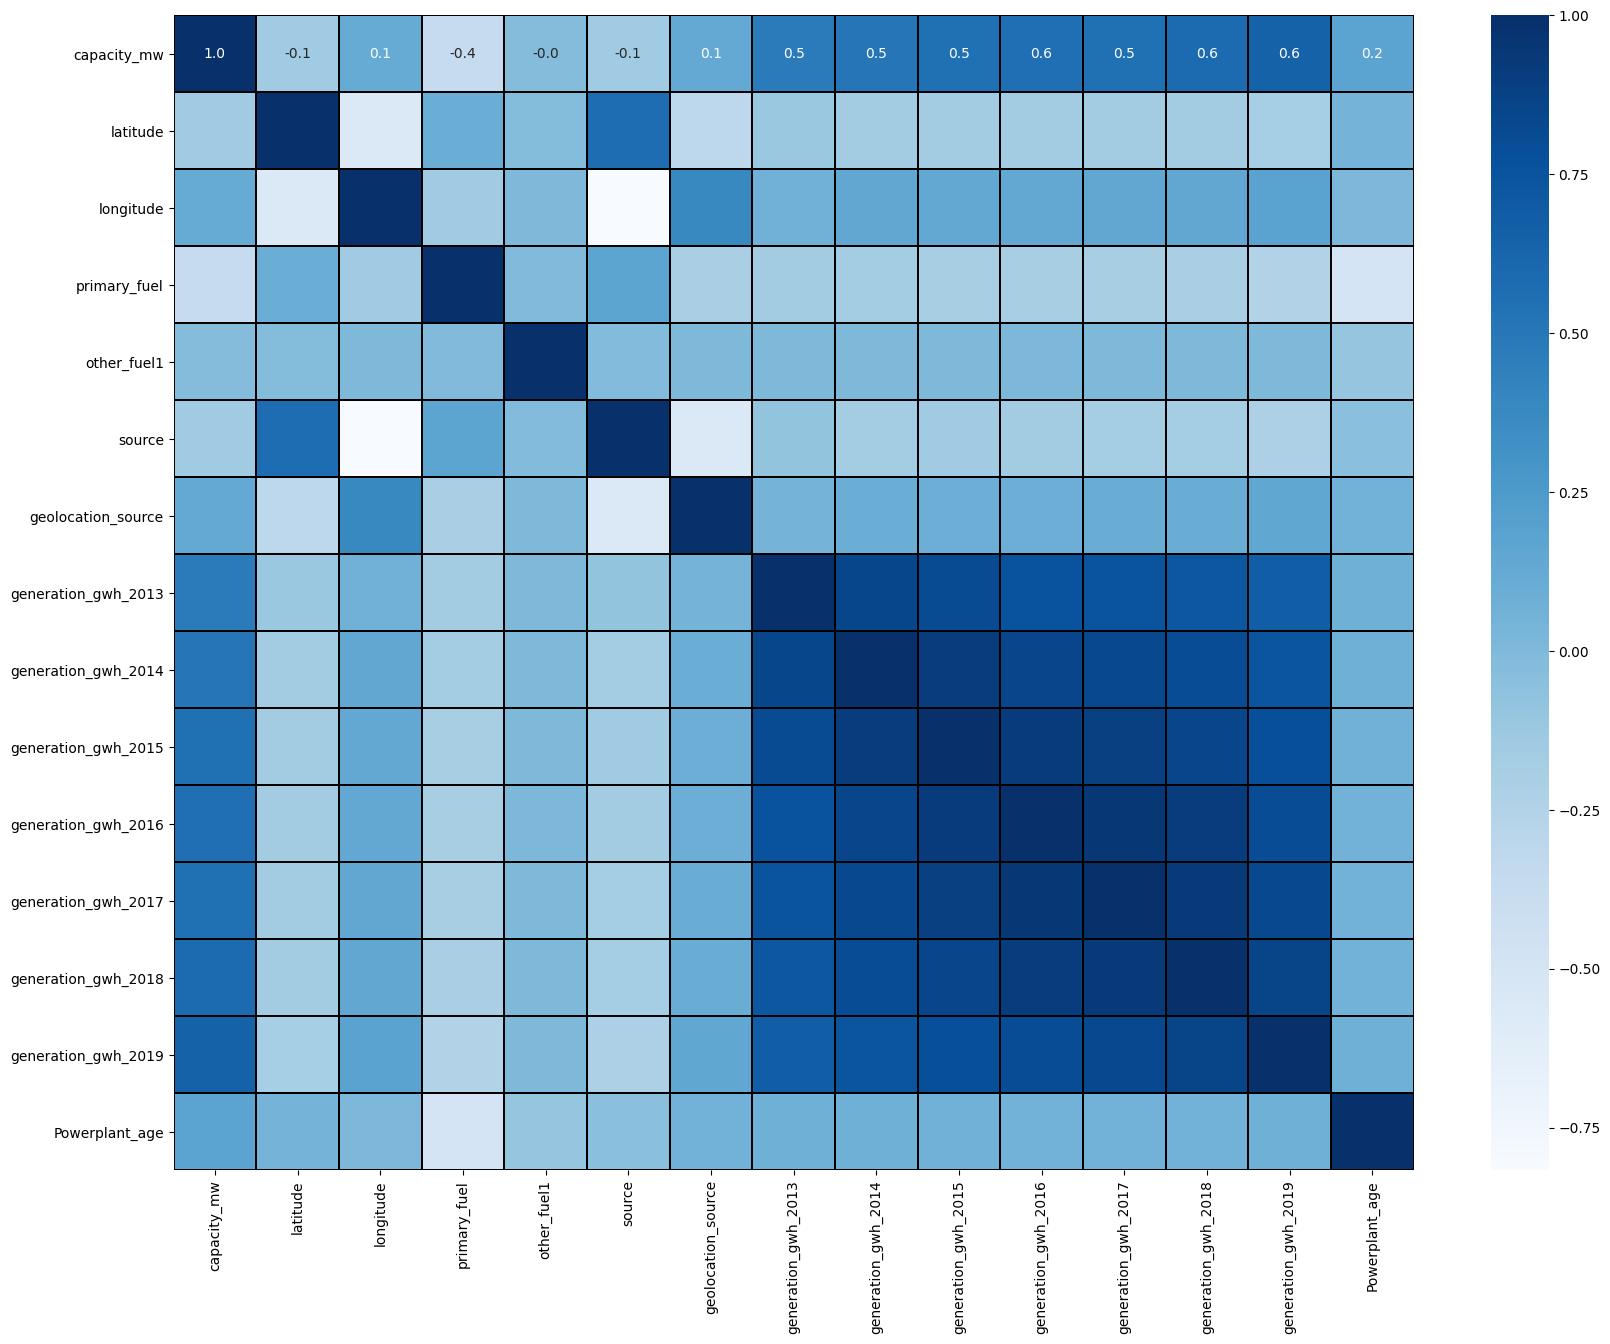

In [115]:
# Visualizing the correlation matrix by plotting a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(ncolumns.corr(), linewidths=0.1, fmt=".1f", linecolor="black", annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.show()

The target variable "capacity_mw" is highly & positively correlated with the features columns "generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2018, generation_gwh_2013, generation_gwh_2019".

The target variable is negatively correlated with the features columns "primary_fuel, source and Power_plant_age,".

The feature columns "other_fuel1" and "latitude" have no relation with the target variable, so we can drop them.

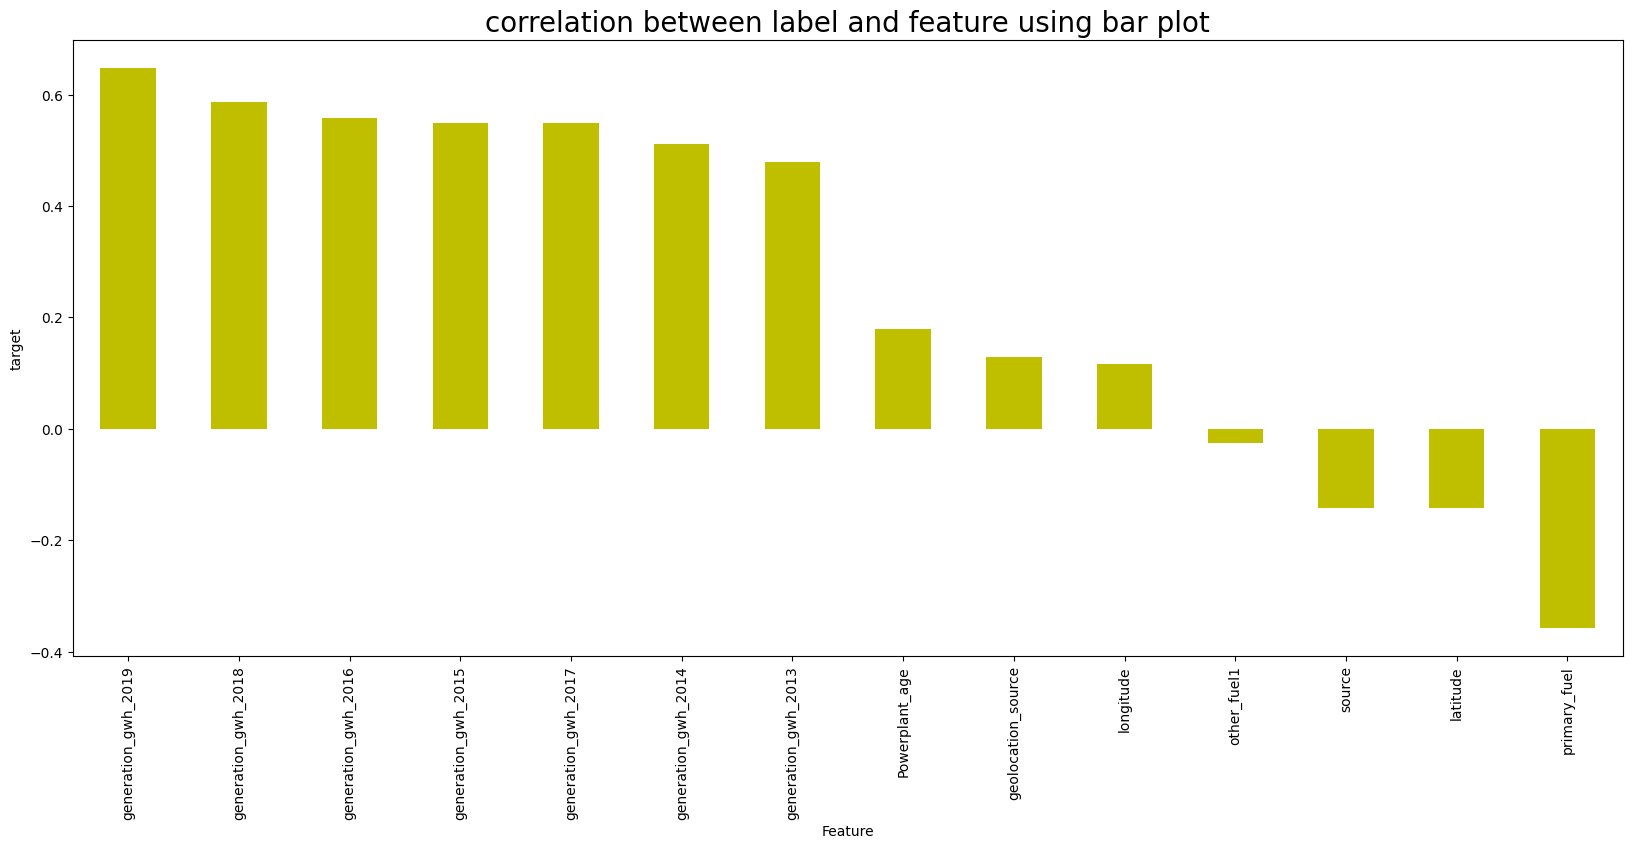

In [116]:
plt.figure(figsize=(20,8))
ncolumns.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [121]:
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)       #executed

In [122]:
new_df.drop('other_fuel2',axis=1,inplace=True)
new_df.drop('other_fuel3',axis=1,inplace=True)   #executed

In [123]:
new_df.sample(10)

capacity_mw  longitude  primary_fuel  source  geolocation_source  \
3581         201.0   -97.6644            13     181                   2   
10128          1.9  -118.0992             5     181                   2   
7297           3.0   -93.3678            13     181                   2   
12083          0.0   -83.4912            10     181                   2   
4852           1.5   -89.0287             7     181                   2   
9004           5.2   -80.8117             0     181                   2   
11094         40.5   -80.0678            12     181                   2   
8788           0.0   -92.6775            10     181                   2   
8711          29.6   -84.9956             5     181                   2   
7945         496.4   -71.4692             1     181                   2   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
3581            628.885000           651.906000           574.616000   
10128             1.347000             1.003000             0.169000   
7297            715.689657           803.561652             0.000000   
12083           563.383222           635.739731           616.801877   
4852              0.000000             0.012000             0.001000   
9004             41.350333             4.071333             0.000000   
11094            53.957000           107.872000           114.265003   
8788            563.383222           635.739731           616.801877   
8711             72.001000           113.122000           128.251000   
7945           1318.603018          1152.849969           791.198000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
3581            579.953000           610.894000           568.456000   
10128             1.737000             0.000000             3.063000   
7297              0.000000             2.477000             6.565000   
12083           561.784508           532.472482           513.679016   
4852              0.000000             0.003000             0.057000   
9004             -0.164000             2.651000             0.091000   
11094           150.851000           128.623000           110.156000   
8788            561.784508           532.472482           513.679016   
8711            105.986000            87.121000           151.436000   
7945            360.409003           238.241004           549.623004   

       generation_gwh_2019  Powerplant_age  
3581            547.940000       13.000000  
10128             0.001000       38.000000  
7297             10.592000        5.000000  
12083           421.938592       14.000000  
4852              0.000000       33.000000  
9004              1.992000        6.000000  
11094           106.092000       67.901235  
8788            421.938592       14.000000  
8711            152.006000       59.000000  
7945            301.654996       55.564464

In [124]:
#Let us save one Data Frame for classification problem
Primary_Fuel_df=new_df

In [125]:
x=new_df.drop('capacity_mw',axis=1)
y=new_df['capacity_mw']

In [126]:
y.value_counts()

capacity_mw
0.0      2018
5.0       541
1.0       503
2.0       461
1.5       257
         ... 
347.7       1
84.7        1
95.7        1
147.2       1
596.7       1
Name: count, Length: 1939, dtype: int64

## Standard Scalarization for Feature Scaling:

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

longitude  primary_fuel    source  geolocation_source  \
0       3.479132      0.528735 -1.655661           -3.359157   
1       3.509479     -1.994500  0.337233            3.120512   
2       3.393355      1.369814 -4.238003            3.120512   
3       3.881003     -1.433781 -4.181865            3.120512   
4       3.377198     -1.994500 -4.181865            3.120512   
...          ...           ...       ...                 ...   
11969   0.147659      1.369814  0.253026           -0.119322   
11970  -0.200595      0.528735  0.253026           -0.119322   
11971  -0.202584      0.528735  0.253026           -0.119322   
11972  -0.474431      0.528735  0.253026           -0.119322   
11973  -0.630367     -1.433781  0.253026           -0.119322   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.561620             0.631306             0.590234   
1                 0.561620             0.631306             0.590234   
2                 0.561620             0.631306             0.590234   
3                -0.491439             0.599394             0.985318   
4                -0.493103             1.551624             1.620921   
...                    ...                  ...                  ...   
11969            -0.489080            -0.494519            -0.479210   
11970            -0.489557            -0.488837            -0.480007   
11971             0.561620             0.631306             0.590234   
11972            -0.495972            -0.498893            -0.483543   
11973            -0.471628            -0.407736            -0.359062   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.531665             0.507911             0.447503   
1                 0.531665             0.507911             0.447503   
2                 0.531665             0.507911             0.447503   
3                 1.106697             0.748879             0.645755   
4                 1.620613             1.637382             1.262940   
...                    ...                  ...                  ...   
11969            -0.461747            -0.467032            -0.452604   
11970            -0.459958            -0.465743            -0.455191   
11971             0.531665             0.507911             0.447503   
11972            -0.464709            -0.469296            -0.457236   
11973            -0.329221            -0.328661            -0.324738   

       generation_gwh_2019  Powerplant_age  
0                 0.225020       -0.472973  
1                 0.225020       -0.294213  
2                 0.225020       -0.294213  
3                 0.692241       -0.055867  
4                 0.951911       -0.115453  
...                    ...             ...  
11969            -0.426311       -0.532560  
11970            -0.425726       -0.890079  
11971             0.225020       -0.294213  
11972             0.028622       -0.294213  
11973            -0.316621       -0.638356  

[11974 rows x 12 columns]

## Checking VIF(Variance Inflation Factor) values

In [128]:
#importing VIF from statsmodels:

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values             Features
0     3.129276            longitude
1     1.473720         primary_fuel
2     3.932142               source
3     1.537508   geolocation_source
4     3.723888  generation_gwh_2013
5     7.536139  generation_gwh_2014
6    11.287577  generation_gwh_2015
7    14.420210  generation_gwh_2016
8    14.343727  generation_gwh_2017
9     9.911635  generation_gwh_2018
10    4.306752  generation_gwh_2019
11    1.350366       Powerplant_age

We can observe that all the columns have VIF less than 10 except column "generation_gwh_2015","generation_gwh_2016","generation_gwh_2017" is above that, which we can ignore

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)

### RandomForestRegressor

In [130]:
RFR = RandomForestRegressor(criterion='poisson', warm_start=True)
RFR.fit(x_train, y_train)

pred_RFR = RFR.predict(x_test)

r2 = r2_score(y_test, pred_RFR)
mae = mean_absolute_error(y_test, pred_RFR)
mse = mean_squared_error(y_test, pred_RFR)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, pred_RFR)
evs = explained_variance_score(y_test, pred_RFR)
median_err = median_absolute_error(y_test, pred_RFR)
max_err = max_error(y_test, pred_RFR)

print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Squared Logarithmic Error (MSLE):', msle)
print('Explained Variance Score (EVS):', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared (R2): 0.715823545211004
Mean Absolute Error (MAE): 33.74673322858382
Mean Squared Error (MSE): 10990.469765347758
Root Mean Squared Error (RMSE): 104.83544136096226
Mean Squared Logarithmic Error (MSLE): 0.6769044233554585
Explained Variance Score (EVS): 0.7158262926859676
Median Absolute Error: 2.0250000000000012
Max Error: 1982.2321868770764


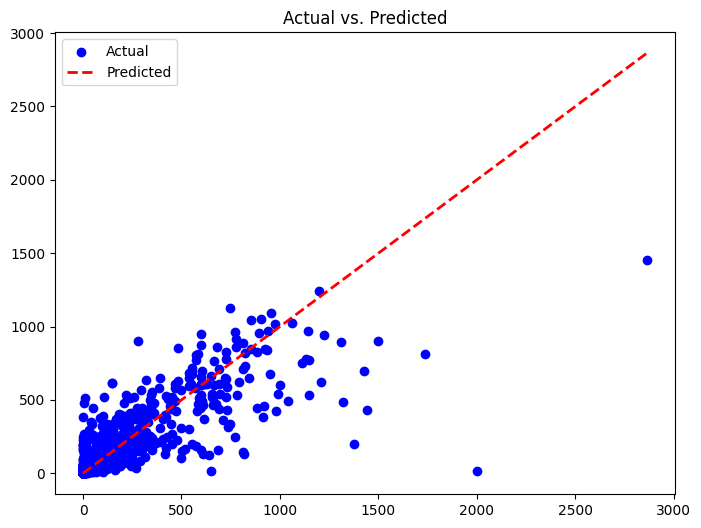

In [131]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_RFR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

## LinearRegression

In [132]:
LR= LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)

r2 = LR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_LR)
mse = mean_squared_error(y_test, pred_LR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_LR)
evs = explained_variance_score(y_test, pred_LR)
median_err = median_absolute_error(y_test, pred_LR)
max_err = max_error(y_test, pred_LR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.4787786653448539
Mean Absolute Error: 70.9220981744413
Mean Squared Error: 21263.91948205313
Root Mean Squared Error: 145.8215329848549
Mean Absolute Percentage Error: 6.074054691909361e+16
Explained Variance Score: 0.4502587865593414
Median Absolute Error: 44.44219887337084
Max Error: 2953.3692772817544


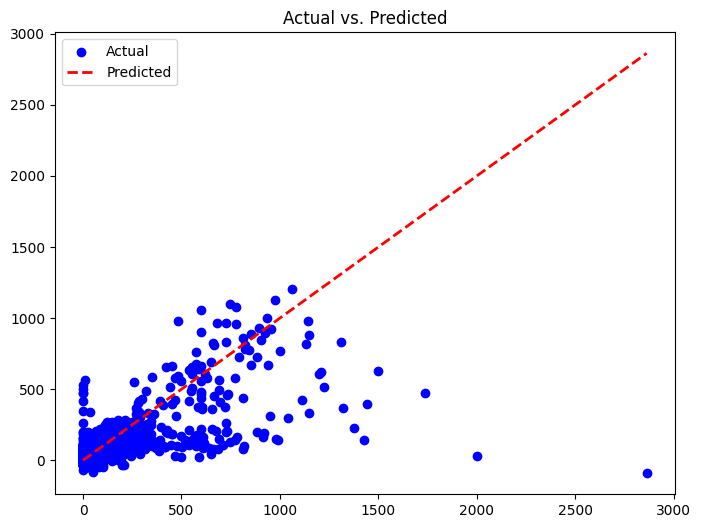

In [133]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_LR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

## KNeighborsRegressor

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [135]:
KNN = KNeighborsRegressor(n_neighbors=7,p=1,weights="distance")
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

r2 = KNN.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_KNN)
mse = mean_squared_error(y_test, pred_KNN)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_KNN)
msle = mean_squared_log_error(y_test, pred_KNN)
evs = explained_variance_score(y_test, pred_KNN)
median_err = median_absolute_error(y_test, pred_KNN)
max_err = max_error(y_test, pred_KNN)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.9999679484417819
Mean Absolute Error: 33.93948845008918
Mean Squared Error: 12854.797839875582
Root Mean Squared Error: 113.37900087703888
Mean Absolute Percentage Error: 5642995673179024.0
Mean Squared Logarithmic Error: 0.6696580406211872
Explained Variance Score: 0.6700207649890788
Median Absolute Error: 2.0845546380832207
Max Error: 1950.3002420413902


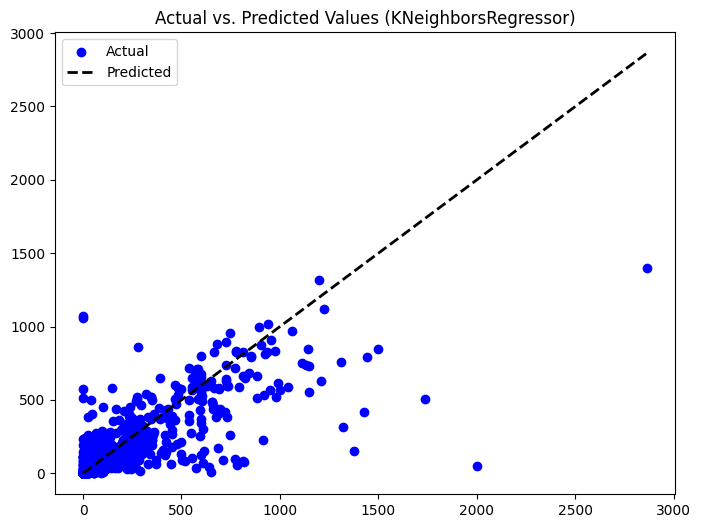

In [136]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_KNN, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values (KNeighborsRegressor)')
plt.legend()
plt.show()

## DecisionTreeRegressor

In [137]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)

r2 = DTR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_DTR)
mse = mean_squared_error(y_test, pred_DTR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_DTR)
msle = mean_squared_log_error(y_test, pred_DTR)
evs = explained_variance_score(y_test, pred_DTR)
median_err = median_absolute_error(y_test, pred_DTR)
max_err = max_error(y_test, pred_DTR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.9999679484417819
Mean Absolute Error: 44.65179928422309
Mean Squared Error: 21224.04271776518
Root Mean Squared Error: 145.68473742216506
Mean Absolute Percentage Error: 6349793411985258.0
Mean Squared Logarithmic Error: 0.7376378375416364
Explained Variance Score: 0.4516221729830623
Median Absolute Error: 1.5
Max Error: 2553.0


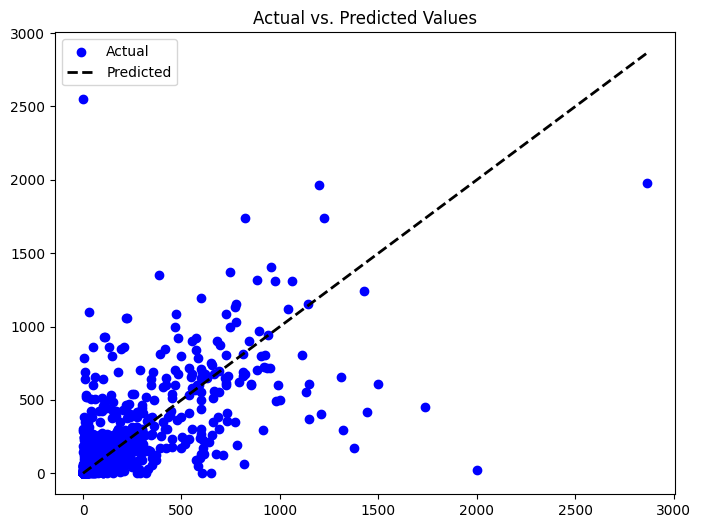

In [138]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_DTR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## Ridge

In [139]:
RR = Ridge()
RR.fit(x_train,y_train)
pred_RR = RR.predict(x_test)


r2 = RR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_RR)
mse = mean_squared_error(y_test, pred_RR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_RR)
evs = explained_variance_score(y_test, pred_RR)
median_err = median_absolute_error(y_test, pred_RR)
max_err = max_error(y_test, pred_RR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.47877862626236534
Mean Absolute Error: 70.92235383336845
Mean Squared Error: 21263.939845681267
Root Mean Squared Error: 145.82160280864173
Mean Absolute Percentage Error: 6.07433966189106e+16
Explained Variance Score: 0.4502582479055255
Median Absolute Error: 44.485540445707784
Max Error: 2953.405081361417


## Lasso

In [140]:
L = Lasso()
L.fit(x_train,y_train)
pred_L = L.predict(x_test)
print('R2_score',r2_score(y_test,pred_L))
print('Mean absolute error:',mean_absolute_error(y_test,pred_L))
print('Mean squared error:',mean_squared_error(y_test,pred_L))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_L)))

r2 = L.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_L)
mse = mean_squared_error(y_test, pred_L)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_L)
evs = explained_variance_score(y_test, pred_L)
median_err = median_absolute_error(y_test, pred_L)
max_err = max_error(y_test, pred_L)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R2_score 0.45126695323351207
Mean absolute error: 70.53896769401302
Mean squared error: 21222.145107736673
Root mean squared error: 145.67822454895816
R-squared: 0.47720940690552693
Mean Absolute Error: 70.53896769401302
Mean Squared Error: 21222.145107736673
Root Mean Squared Error: 145.67822454895816
Mean Absolute Percentage Error: 6.054734889039488e+16
Explained Variance Score: 0.451335821348948
Median Absolute Error: 45.60810926925701
Max Error: 2957.9639625170657


## AdaBoostRegressor

In [141]:
from sklearn.model_selection import GridSearchCV

abr = AdaBoostRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0, 1.05]
}

grid_search = GridSearchCV(abr, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1, 'n_estimators': 100}

In [142]:
abr = AdaBoostRegressor(learning_rate=.1, n_estimators=100)
abr.fit(x_train,y_train)
pred_abr = abr.predict(x_test)

r2 = abr.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_abr)
mse = mean_squared_error(y_test, pred_abr)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_abr)
msle = mean_squared_log_error(y_test, pred_abr)
evs = explained_variance_score(y_test, pred_abr)
median_err = median_absolute_error(y_test, pred_abr)
max_err = max_error(y_test, pred_abr)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)


R-squared: 0.3519440710132983
Mean Absolute Error: 99.68116775345496
Mean Squared Error: 28427.407302230353
Root Mean Squared Error: 168.60429206348917
Mean Absolute Percentage Error: 1.7500326383233442e+16
Mean Squared Logarithmic Error: 5.163449525854552
Explained Variance Score: 0.38840047294879787
Median Absolute Error: 25.566666666666748
Max Error: 1952.6992728789269


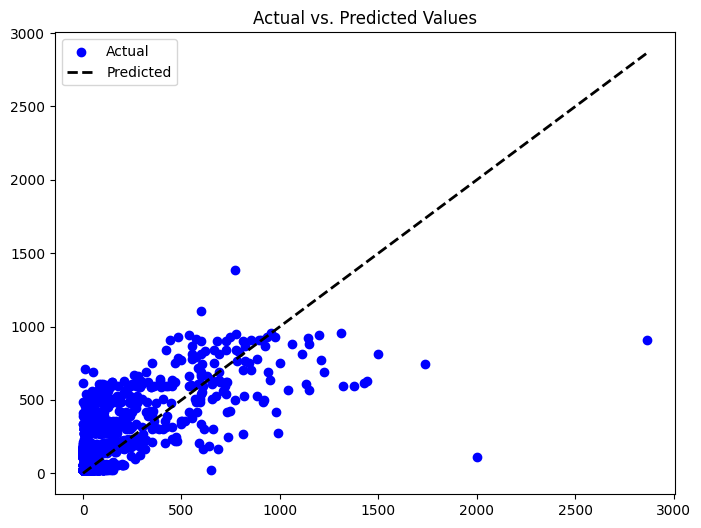

In [143]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_abr, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

##### DecisionTreeRegressor work best

In [144]:
# Save the model as a objectfile
import joblib

joblib.dump(DTR,'Global_Power_Plant_Database')

['Global_Power_Plant_Database']

# Second model Classification Model

In [145]:
dfc=Primary_Fuel_df

In [146]:
dfc.head(10)

capacity_mw  longitude  primary_fuel  source  geolocation_source  \
512          2.5    73.2407            10     113                   1   
513         98.0    74.6090             1     184                   3   
514         39.2    69.3732            13      21                   3   
515        135.0    91.3602             3      23                   3   
517        250.0    68.6447             1      23                   3   
518         60.0    77.0078             5      23                   3   
519        192.0    77.2070             5      23                   3   
520        290.0    75.8863             5      23                   3   
521        210.0    81.6373             1      23                   3   
523        134.0    76.4938             5      23                   3   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
512           563.383222           635.739731           616.801877   
513           563.383222           635.739731           616.801877   
514           563.383222           635.739731           616.801877   
515             2.414610           617.789264           843.747000   
517             1.528000          1153.421000          1208.852000   
518             5.036000           157.558250           152.195200   
519             0.215000           674.391100           721.335200   
520           425.505000           480.594950           144.434200   
521          1113.062895          1887.904000          1643.046000   
523             0.000000           614.412500           665.197300   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
512           561.784508           532.472482           513.679016   
513           561.784508           532.472482           513.679016   
514           561.784508           532.472482           513.679016   
515           886.004428           663.774500           626.239128   
517          1175.765000          1147.913000           976.655000   
518            61.421350            89.629600            48.327150   
519           675.724400           679.594950           579.318850   
520           402.029750           439.372100           406.377900   
521          1338.093000          1563.457000          1487.880000   
523           670.500650           644.570950           425.641100   

     generation_gwh_2019  Powerplant_age  
512           421.938592            11.0  
513           421.938592            14.0  
514           421.938592            14.0  
515           723.739667            18.0  
517           891.474100            17.0  
518           242.165667            52.0  
519           700.457000            12.0  
520           493.278000            18.0  
521          2387.765677            14.0  
523           606.805333            37.0

In [147]:
dfc.sample(10)

capacity_mw  longitude  primary_fuel  source  geolocation_source  \
13120          0.0  -117.7375            10     181                   2   
8715           4.0  -119.3088            10     181                   2   
2417           1.6  -114.7914             0     181                   2   
4582           4.8   -81.3862            10     181                   2   
7850           5.0   -79.0627            10     181                   2   
9565          16.0  -117.9556             0     181                   2   
12369          0.0   -96.5403            10     181                   2   
6694          69.5   -81.8439             0     181                   2   
12661          4.0   -94.2597            12     181                   2   
5145           0.0   -88.3522            10     181                   2   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
13120           563.383222           635.739731           616.801877   
8715              8.786000             3.229947             4.500333   
2417              8.044000             8.744000             8.760000   
4582              5.061623             6.570667             4.040667   
7850              9.234667             6.184260             3.535000   
9565             43.273000            47.998000            47.209000   
12369           563.383222           635.739731           616.801877   
6694            502.708003           372.638601           464.226319   
12661            30.908000            32.141000            33.333000   
5145              0.062720             0.038220             0.007840   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
13120           561.784508           532.472482           513.679016   
8715              5.873333             5.348000             7.490667   
2417              8.692000             9.711000             8.813000   
4582              6.701333             6.324667             7.539667   
7850              9.900000            10.278000             9.417000   
9565             52.475000            51.834000            49.200000   
12369           561.784508           532.472482           513.679016   
6694            479.175293           456.519898           466.892100   
12661            30.837000            32.383000            33.183000   
5145              0.017640             0.030380             0.000000   

       generation_gwh_2019  Powerplant_age  
13120           421.938592       14.000000  
8715              7.313000       10.000000  
2417              9.513000       13.000000  
4582              5.339000        3.000000  
7850              9.376000        7.000000  
9565             53.439000       29.000000  
12369           421.938592       14.000000  
6694            449.751710       49.460432  
12661            33.504000       12.000000  
5145              0.000000       14.000000

## Checking Correlation

In [148]:
dfc.corr()

capacity_mw  longitude  primary_fuel    source  \
capacity_mw             1.000000   0.117090     -0.357424 -0.142809   
longitude               0.117090   1.000000     -0.145828 -0.817030   
primary_fuel           -0.357424  -0.145828      1.000000  0.163105   
source                 -0.142809  -0.817030      0.163105  1.000000   
geolocation_source      0.128606   0.376291     -0.201956 -0.559611   
generation_gwh_2013     0.478243   0.069953     -0.157429 -0.081209   
generation_gwh_2014     0.511208   0.143958     -0.165386 -0.165234   
generation_gwh_2015     0.549957   0.137759     -0.191166 -0.156772   
generation_gwh_2016     0.557447   0.139489     -0.191207 -0.162290   
generation_gwh_2017     0.549118   0.148261     -0.187359 -0.176248   
generation_gwh_2018     0.586267   0.147449     -0.201304 -0.173753   
generation_gwh_2019     0.648098   0.185760     -0.248156 -0.218850   
Powerplant_age          0.178627   0.006479     -0.497318 -0.048687   

                     geolocation_source  generation_gwh_2013  \
capacity_mw                    0.128606             0.478243   
longitude                      0.376291             0.069953   
primary_fuel                  -0.201956            -0.157429   
source                        -0.559611            -0.081209   
geolocation_source             1.000000             0.042667   
generation_gwh_2013            0.042667             1.000000   
generation_gwh_2014            0.092994             0.844850   
generation_gwh_2015            0.088748             0.815031   
generation_gwh_2016            0.090621             0.761345   
generation_gwh_2017            0.101701             0.748871   
generation_gwh_2018            0.103177             0.728237   
generation_gwh_2019            0.151605             0.675897   
Powerplant_age                 0.058114             0.074349   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.511208             0.549957   
longitude                       0.143958             0.137759   
primary_fuel                   -0.165386            -0.191166   
source                         -0.165234            -0.156772   
geolocation_source              0.092994             0.088748   
generation_gwh_2013             0.844850             0.815031   
generation_gwh_2014             1.000000             0.913516   
generation_gwh_2015             0.913516             1.000000   
generation_gwh_2016             0.852878             0.921302   
generation_gwh_2017             0.835462             0.890351   
generation_gwh_2018             0.807371             0.857684   
generation_gwh_2019             0.738808             0.785610   
Powerplant_age                  0.072374             0.067844   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.557447             0.549118   
longitude                       0.139489             0.148261   
primary_fuel                   -0.191207            -0.187359   
source                         -0.162290            -0.176248   
geolocation_source              0.090621             0.101701   
generation_gwh_2013             0.761345             0.748871   
generation_gwh_2014             0.852878             0.835462   
generation_gwh_2015             0.921302             0.890351   
generation_gwh_2016             1.000000             0.948768   
generation_gwh_2017             0.948768             1.000000   
generation_gwh_2018             0.909839             0.933093   
generation_gwh_2019             0.807300             0.834693   
Powerplant_age                  0.062292             0.060060   

                     generation_gwh_2018  generation_gwh_2019  Powerplant_age  
capacity_mw                     0.586267             0.648098        0.178627  
longitude                       0.147449             0.185760        0.006479  
primary_fuel                   -0.201304            -0.248156      

<Axes: >

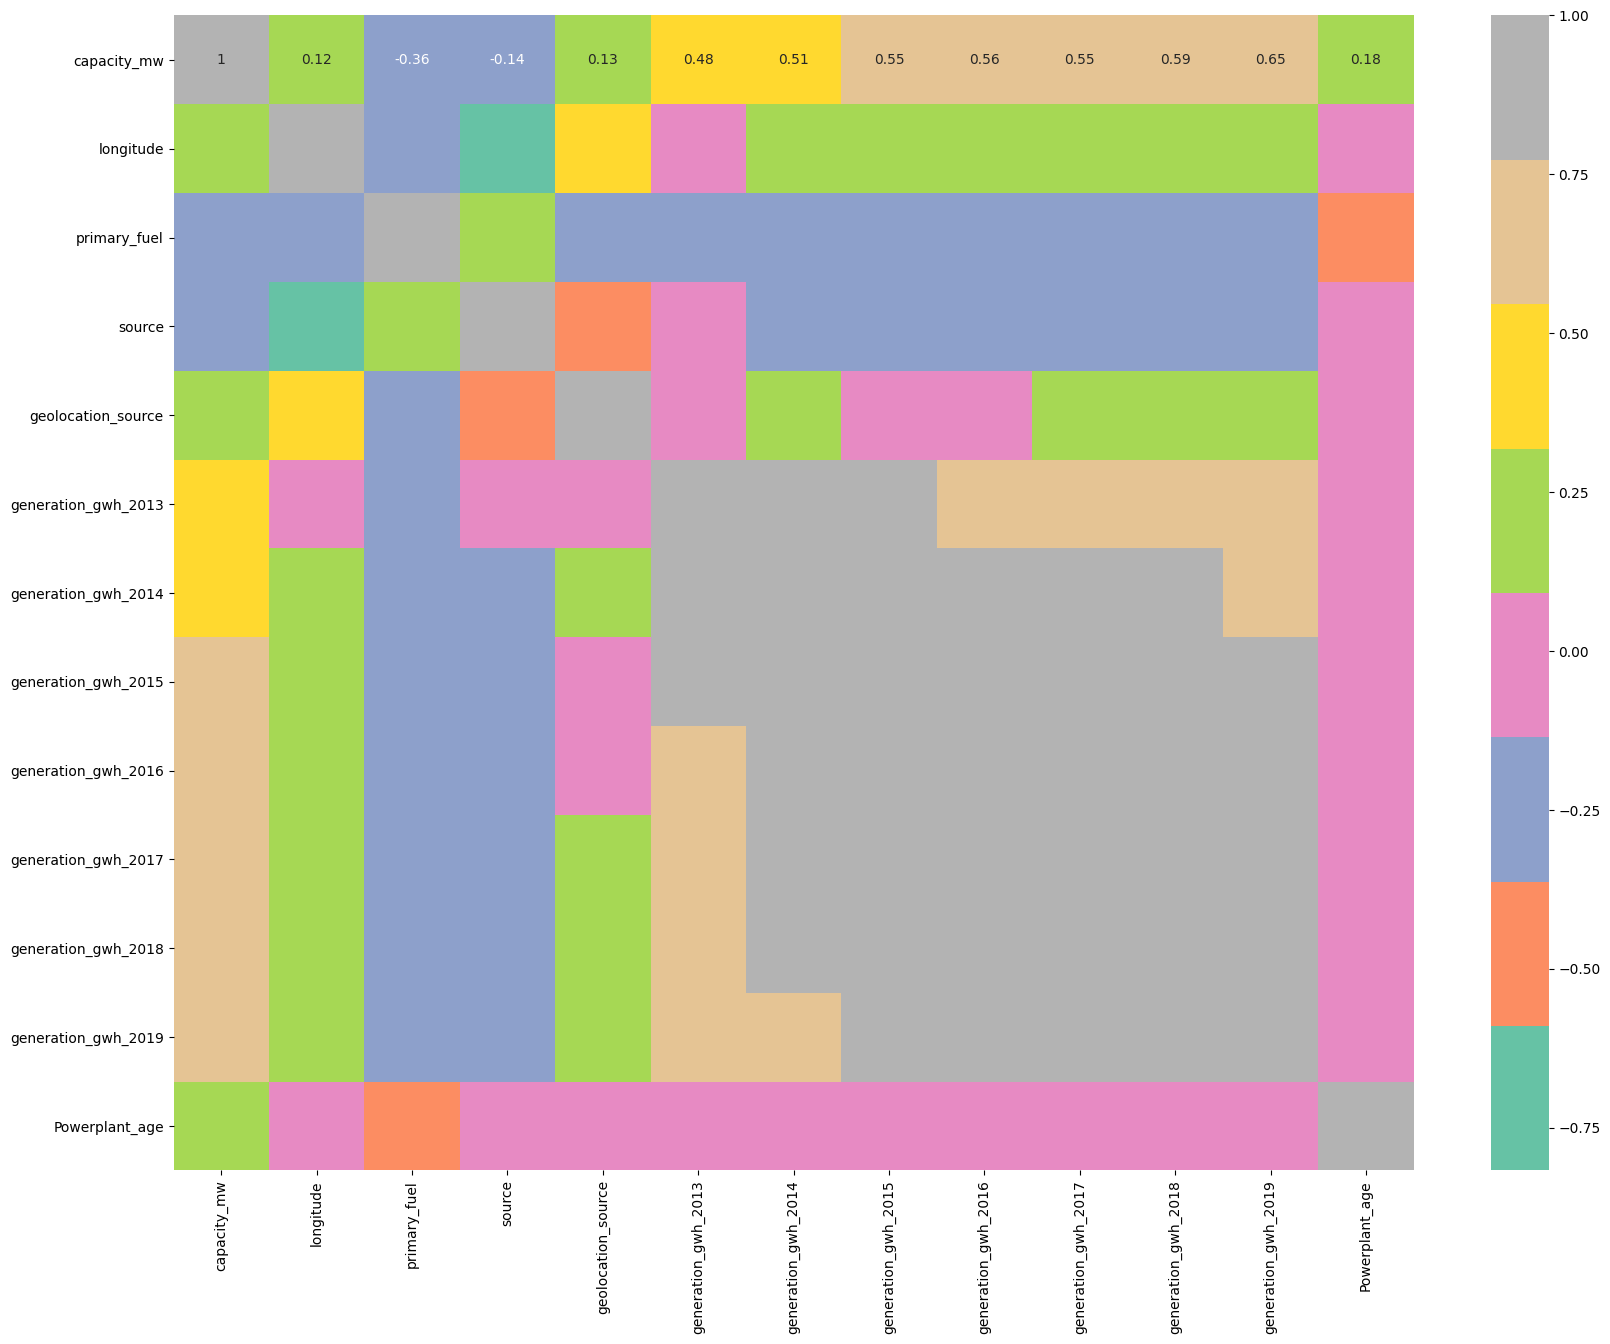

In [149]:
plt.figure(figsize=(20,15))
sns.heatmap(dfc.corr(), annot = True, linecolor="black",cmap="Set2")

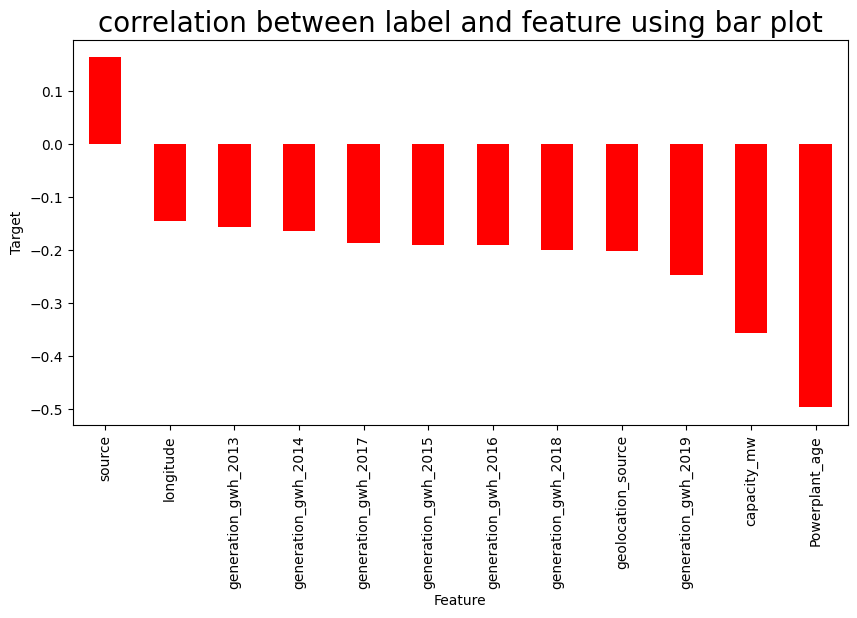

In [150]:
plt.figure(figsize=(10,5))
dfc.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

 We will have to drop the columns "source" and "longitude" as this columns do not contribute much in building our model

In [151]:
dfc.drop(columns=['source','longitude'],axis=1,inplace=True)

## Seprating features and label

In [152]:
x=dfc.drop("primary_fuel",axis=1)  
y=dfc['primary_fuel']  

## Standard Scalarization for feature scaling

we will not do Standard Scalarization beacuse in this case model predict wrong

In [153]:
y.value_counts()

primary_fuel
10    5408
3     1807
5     1268
13    1261
7      898
12     545
1      342
0      205
11     104
4       65
2       34
8       16
6       11
9       10
Name: count, dtype: int64

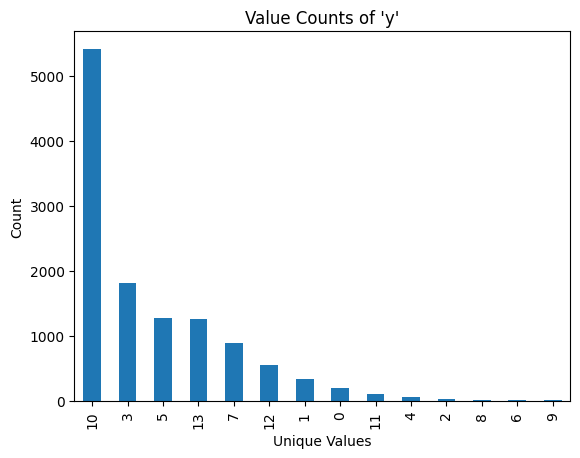

In [154]:
y.value_counts().plot(kind='bar')
plt.title("Value Counts of 'y'")
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)

In [156]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (9579, 10)
y_train shape: (9579,)
x_test shape: (2395, 10)
y_test.shape: (2395,)


## Checking accuracy for RandomForestClassifier

In [157]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'gini'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'gini'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'gini'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'entropy'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'entropy'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'}
Test Accuracy: 0.8054279749478079


Accuracy: 0.7720250521920669
Confusion Matrix:
 [[   4    1    0    6    0    8    0    1    0    0   16    0    6    4]
 [   2   22    0   20    0   12    0    0    0    0    0    0    0   13]
 [   0    0    0    3    0    1    0    0    0    0    1    0    0    0]
 [   0    4    0  235    0   30    0   29    0    0   38    4   24   21]
 [   0    0    0    7    0    2    0    0    0    0    1    0    0    0]
 [   1    8    0   11    0  202    0    8    0    0    7    0    7    1]
 [   0    2    0    1    0    0    0    0    0    0    1    0    0    0]
 [   0    1    0   23    0    8    0  148    0    0    8    0    0    5]
 [   0    0    0    3    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    2    0    1    0    1    0    0    0    0    0    0]
 [   0    0    0    2    0    1    0    2    0    0 1023    0    0   23]
 [   0    0    0    0    0    0    0    0    0    0    7   11    0    0]
 [   0    0    0   25    0   18    0    1    0    0   19    1   37    2]
 [ 

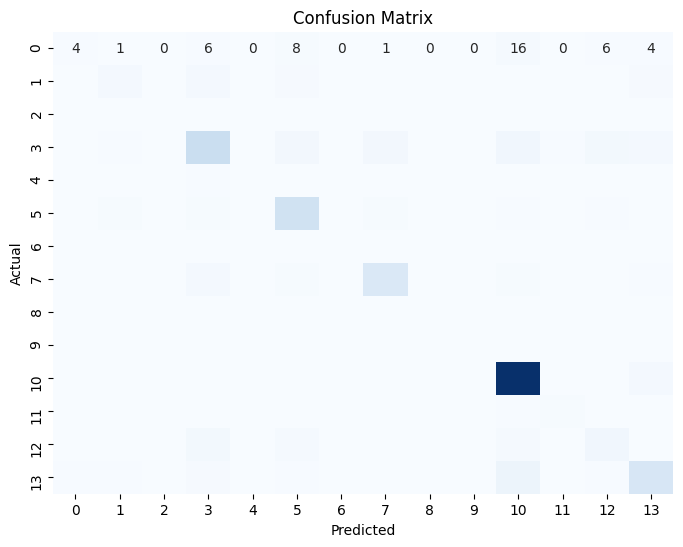

In [158]:
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

accuracy = accuracy_score(y_test, predRFC)
conf_matrix = confusion_matrix(y_test, predRFC)
class_report = classification_report(y_test, predRFC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## DecisionTreeClassifier

In [159]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.7511482254697286


Accuracy: 0.7515657620041754
Confusion Matrix:
 [[   5    4    0   13    0    3    0    3    0    0    8    0    5    5]
 [   5   23    0   18    0   15    0    0    0    0    0    0    0    8]
 [   0    0    0    4    0    1    0    0    0    0    0    0    0    0]
 [   1   10    0  236    0   35    0   38    0    0   10    5   25   25]
 [   0    0    0    5    0    1    0    0    0    0    1    0    1    2]
 [   1    5    0   38    0  177    0    8    0    0    6    0    5    5]
 [   0    1    0    2    0    0    0    0    0    0    1    0    0    0]
 [   1    1    0   34    0    5    0  140    0    0    6    0    2    4]
 [   0    0    0    3    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    2    0    1    0    1    0    0    0    0    0    0]
 [   2    1    0    6    0    0    0    8    0    0 1000    3    3   28]
 [   1    0    0    0    0    0    0    1    0    0    5   11    0    0]
 [   1    0    0   32    0    8    0    1    0    0    6    2   34   19]
 [ 

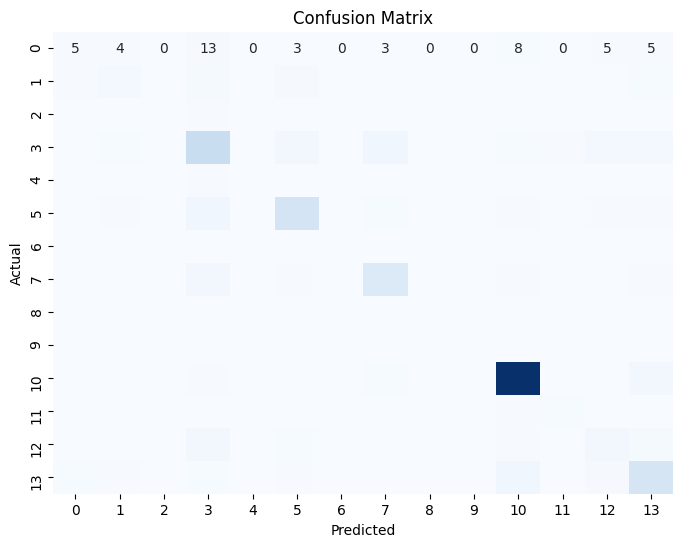

In [160]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth = 10, min_samples_split=2, min_samples_leaf=1)
dtc.fit(x_train, y_train)

pred_dtc = dtc.predict(x_test)

accuracy = accuracy_score(y_test, pred_dtc)
conf_matrix = confusion_matrix(y_test, pred_dtc)
class_report = classification_report(y_test, pred_dtc)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ExtraTreesClassifier

In [161]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(x_train, y_train)
    y_pred = et_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.7916492693110647


Accuracy: 0.7640918580375783
Confusion Matrix:
 [[   7    1    0    4    0    6    0    0    0    0   19    0    4    5]
 [   3   27    0   18    0   11    0    0    0    0    0    0    1    9]
 [   0    0    0    3    0    1    0    0    0    0    1    0    0    0]
 [   1    7    0  216    0   33    0   45    0    0   47    2   17   17]
 [   0    0    0    5    0    1    0    0    0    0    1    0    2    1]
 [   1    8    0   14    0  196    0    8    0    0   10    0    5    3]
 [   0    2    0    0    0    1    0    0    0    0    1    0    0    0]
 [   0    1    1   19    0    6    0  140    0    0   21    0    0    5]
 [   0    0    0    2    0    0    0    1    0    0    0    0    0    0]
 [   0    0    0    1    0    1    0    2    0    0    0    0    0    0]
 [   0    0    0    0    0    2    0    0    0    0 1028    1    1   19]
 [   0    0    0    0    0    0    0    1    0    0   17    0    0    0]
 [   3    0    0   17    0   13    0    1    0    0   23    1   41    4]
 [ 

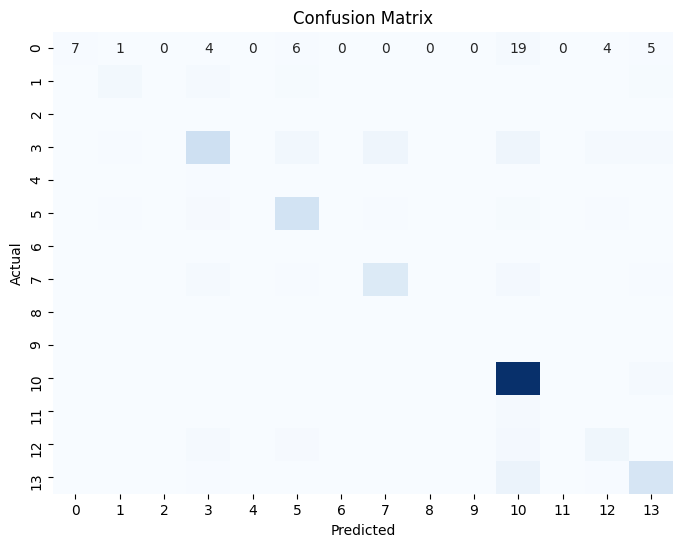

In [162]:
EXC = ExtraTreesClassifier(n_estimators=100, criterion='gini',max_depth=20,min_samples_split=2,min_samples_leaf=1)
EXC.fit(x_train, y_train)

pred_EXC = EXC.predict(x_test)

accuracy = accuracy_score(y_test, pred_EXC)
conf_matrix = confusion_matrix(y_test, pred_EXC)
class_report = classification_report(y_test, pred_EXC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## GradientBoostingClassifier

In [163]:
param_combinations = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 250, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    gb_classifier = GradientBoostingClassifier(**params, random_state=42)
    gb_classifier.fit(x_train, y_train)
    y_pred = gb_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4}
Test Accuracy: 0.7837160751565762


Accuracy: 0.7816283924843423
Confusion Matrix:
 [[   8    0    0    8    0    4    0    3    0    1   11    0    8    3]
 [   3   18    0   20    0   13    0    1    0    1    0    0    1   12]
 [   0    0    0    3    0    1    0    0    0    0    0    0    1    0]
 [   2    8    0  241    0   26    1   36    0    0   14    0   34   23]
 [   0    0    1    3    0    2    0    0    0    0    1    0    2    1]
 [   1    7    0   14    3  195    0    5    0    0    6    0   12    2]
 [   0    1    0    1    0    1    0    0    0    0    1    0    0    0]
 [   0    0    0   36    0    3    0  142    0    0    6    0    2    4]
 [   0    0    0    3    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    2    0    1    0    1    0    0    0    0    0    0]
 [   0    0    0    5    0    0    0    4    0    0 1017    1    3   21]
 [   1    0    0    0    0    0    0    1    0    0    5   11    0    0]
 [   4    1    0   21    1   10    0    2    0    0    5    0   57    2]
 [ 

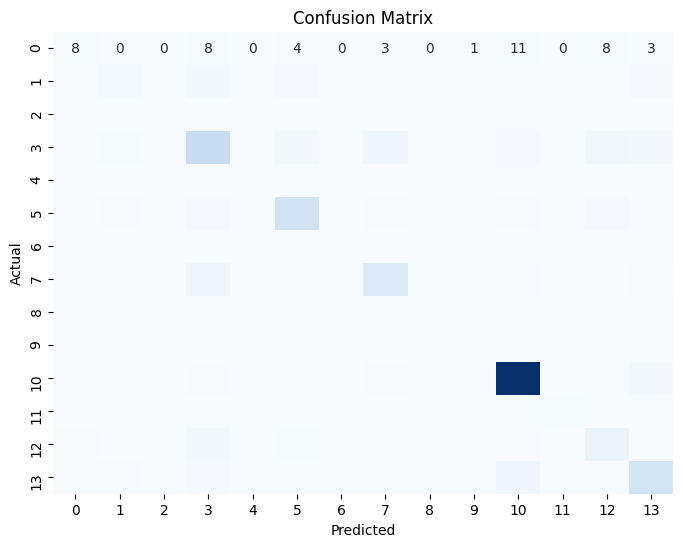

In [164]:
GBC = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3)
GBC.fit(x_train, y_train)

pred_GBC = GBC.predict(x_test)

accuracy = accuracy_score(y_test, pred_GBC)
conf_matrix = confusion_matrix(y_test, pred_GBC)
class_report = classification_report(y_test, pred_GBC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## AdaBoostClassifier

In [165]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 150, 'learning_rate': 0.1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    ada_classifier = AdaBoostClassifier(**params, random_state=42)
    ada_classifier.fit(x_train, y_train)
    y_pred = ada_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 150, 'learning_rate': 0.1}
Test Accuracy: 0.617536534446764


Accuracy: 0.6091858037578288
Confusion Matrix:
 [[  0   3   0   3   0   4   0   4   2   3   8   0   2  17]
 [  0   2   0  31   0   5   0  11   0   5   0   0   0  15]
 [  0   0   0   3   0   1   0   0   0   0   1   0   0   0]
 [  0   0   0 139   0  52   0  93   3  14  31   0  20  33]
 [  0   0   0   4   0   1   0   0   1   0   1   0   3   0]
 [  2   6   0  27   0 145   0  18   0  28   6   0   4   9]
 [  0   1   0   1   0   0   0   1   0   0   1   0   0   0]
 [  0   1   0  14   0  14   0 146   0   3   2   1   4   8]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   1   0   1   0   0   0   0   0   0]
 [  0   0   0   9   0   1   8  11   0   0 881  32   1 108]
 [  0   0   0   1   0   0   0   4   0   0   2  11   0   0]
 [  0   0   0  15   0  27   0   3   2   1  12   0  18  25]
 [  1   0   0  56   0   6   0  15   0   2  49   0  13 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00   

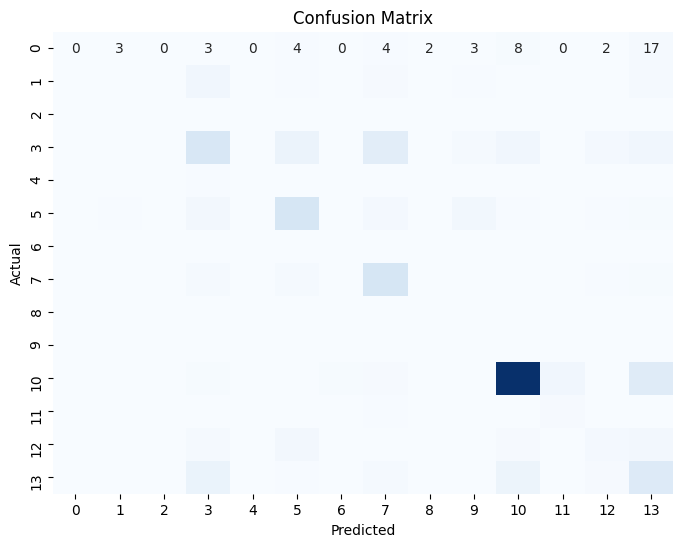

In [166]:
ABC = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
ABC.fit(x_train, y_train)
pred_ABC = ABC.predict(x_test)

accuracy = accuracy_score(y_test, pred_ABC)
conf_matrix = confusion_matrix(y_test, pred_ABC)
class_report = classification_report(y_test, pred_ABC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## GradientBoostingClassifier works good

#### Cross Validation Score

In [177]:
# Checking cv score for GBC
score = cross_val_score(GBC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, pred_GBC) - score.mean())

[0.64592902 0.79331942 0.80584551 0.78037578 0.78111947]
0.7613178387862488
0.020310553698093536


In [178]:
# Save the model as a objectfile
import joblib

joblib.dump(GBC,'Global_Power_Plant_Database')

['Global_Power_Plant_Database']

In [179]:
model=joblib.load(open("Global_Power_Plant_Database","rb"))

In [180]:
dfc.head(10)

capacity_mw  primary_fuel  geolocation_source  generation_gwh_2013  \
512          2.5            10                   1           563.383222   
513         98.0             1                   3           563.383222   
514         39.2            13                   3           563.383222   
515        135.0             3                   3             2.414610   
517        250.0             1                   3             1.528000   
518         60.0             5                   3             5.036000   
519        192.0             5                   3             0.215000   
520        290.0             5                   3           425.505000   
521        210.0             1                   3          1113.062895   
523        134.0             5                   3             0.000000   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
512           635.739731           616.801877           561.784508   
513           635.739731           616.801877           561.784508   
514           635.739731           616.801877           561.784508   
515           617.789264           843.747000           886.004428   
517          1153.421000          1208.852000          1175.765000   
518           157.558250           152.195200            61.421350   
519           674.391100           721.335200           675.724400   
520           480.594950           144.434200           402.029750   
521          1887.904000          1643.046000          1338.093000   
523           614.412500           665.197300           670.500650   

     generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
512           532.472482           513.679016           421.938592   
513           532.472482           513.679016           421.938592   
514           532.472482           513.679016           421.938592   
515           663.774500           626.239128           723.739667   
517          1147.913000           976.655000           891.474100   
518            89.629600            48.327150           242.165667   
519           679.594950           579.318850           700.457000   
520           439.372100           406.377900           493.278000   
521          1563.457000          1487.880000          2387.765677   
523           644.570950           425.641100           606.805333   

     Powerplant_age  
512            11.0  
513            14.0  
514            14.0  
515            18.0  
517            17.0  
518            52.0  
519            12.0  
520            18.0  
521            14.0  
523            37.0

In [184]:
test = (2.5,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,11.0) #taking data from 1st row of the df
test = test + (0.0, 0.0)
arr = np.asarray(test)    # changing input_data to a numpy array
reshape = arr.reshape(1,-1)  # reshape the array
pred = model.predict(reshape)
print(pred)

[10]


Model is giving correct predictions